In [2]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
#from model import discriminator, generator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
start_time = time.time()
plt.rcParams['image.cmap'] = 'gray'

def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))

    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))

In [4]:
# Discriminator Loss => BCELoss
def d_loss_function(inputs, targets):
    return nn.BCELoss()(inputs, targets)


def g_loss_function(inputs):
    targets = torch.ones([inputs.shape[0], 1])
    targets = targets.to(device)
    return nn.BCELoss()(inputs, targets)

In [6]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

GPU State: cuda:0


In [7]:
device

'cuda:0'

##Model

In [8]:
class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [9]:
class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

In [10]:
# Model
G = generator().to(device)
D = discriminator().to(device)
print(G)
print(D)

generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Tanh()
  )
)
discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [11]:
# Settings
epochs = 200
lr = 0.0002
batch_size = 64
g_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

##Load Data

In [12]:
# Transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])


# Load data
train_set = datasets.MNIST('mnist/', train=True, download=True, transform=transform)
test_set = datasets.MNIST('mnist/', train=False, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

##Training

[1/200, 100/938] D_loss: 0.657 G_loss: 0.850
[1/200, 200/938] D_loss: 0.646 G_loss: 0.878
[1/200, 300/938] D_loss: 0.745 G_loss: 0.722
[1/200, 400/938] D_loss: 0.571 G_loss: 1.017
[1/200, 500/938] D_loss: 0.610 G_loss: 0.948
[1/200, 600/938] D_loss: 0.689 G_loss: 0.786
[1/200, 700/938] D_loss: 0.580 G_loss: 1.089
[1/200, 800/938] D_loss: 0.486 G_loss: 2.624
[1/200, 900/938] D_loss: 0.326 G_loss: 1.877
[1/200, 938/938] D_loss: 0.325 G_loss: 2.628


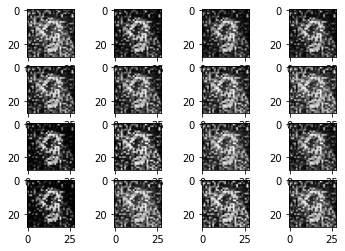

[2/200, 100/938] D_loss: 0.404 G_loss: 1.369
[2/200, 200/938] D_loss: 0.303 G_loss: 2.331
[2/200, 300/938] D_loss: 0.388 G_loss: 1.686
[2/200, 400/938] D_loss: 0.290 G_loss: 2.332
[2/200, 500/938] D_loss: 0.252 G_loss: 1.978
[2/200, 600/938] D_loss: 0.326 G_loss: 2.361
[2/200, 700/938] D_loss: 0.264 G_loss: 2.511
[2/200, 800/938] D_loss: 0.330 G_loss: 2.076
[2/200, 900/938] D_loss: 0.275 G_loss: 2.905
[2/200, 938/938] D_loss: 0.166 G_loss: 3.200


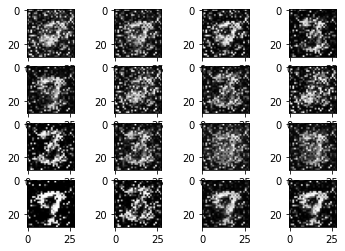

[3/200, 100/938] D_loss: 0.385 G_loss: 3.518
[3/200, 200/938] D_loss: 0.278 G_loss: 2.242
[3/200, 300/938] D_loss: 0.322 G_loss: 3.347
[3/200, 400/938] D_loss: 0.346 G_loss: 2.316
[3/200, 500/938] D_loss: 0.403 G_loss: 1.492
[3/200, 600/938] D_loss: 0.285 G_loss: 3.113
[3/200, 700/938] D_loss: 0.273 G_loss: 2.287
[3/200, 800/938] D_loss: 0.301 G_loss: 3.956
[3/200, 900/938] D_loss: 0.328 G_loss: 2.951
[3/200, 938/938] D_loss: 0.364 G_loss: 1.995


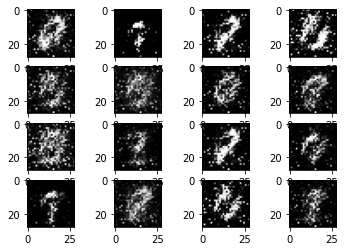

[4/200, 100/938] D_loss: 0.340 G_loss: 1.941
[4/200, 200/938] D_loss: 0.467 G_loss: 1.121
[4/200, 300/938] D_loss: 0.233 G_loss: 2.684
[4/200, 400/938] D_loss: 0.317 G_loss: 1.793
[4/200, 500/938] D_loss: 0.438 G_loss: 3.053
[4/200, 600/938] D_loss: 0.429 G_loss: 1.465
[4/200, 700/938] D_loss: 0.383 G_loss: 1.401
[4/200, 800/938] D_loss: 0.517 G_loss: 1.416
[4/200, 900/938] D_loss: 0.421 G_loss: 2.524
[4/200, 938/938] D_loss: 0.526 G_loss: 0.919


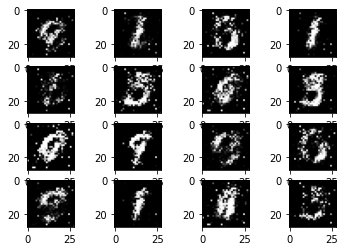

[5/200, 100/938] D_loss: 0.302 G_loss: 2.178
[5/200, 200/938] D_loss: 0.373 G_loss: 1.464
[5/200, 300/938] D_loss: 0.410 G_loss: 2.109
[5/200, 400/938] D_loss: 0.330 G_loss: 1.597
[5/200, 500/938] D_loss: 0.395 G_loss: 1.351
[5/200, 600/938] D_loss: 0.436 G_loss: 1.557
[5/200, 700/938] D_loss: 0.409 G_loss: 1.160
[5/200, 800/938] D_loss: 0.416 G_loss: 1.372
[5/200, 900/938] D_loss: 0.302 G_loss: 2.158
[5/200, 938/938] D_loss: 0.607 G_loss: 3.360


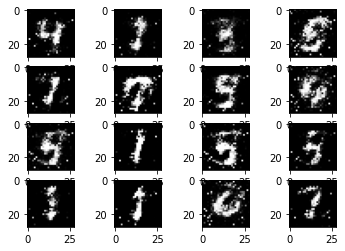

[6/200, 100/938] D_loss: 0.509 G_loss: 1.234
[6/200, 200/938] D_loss: 0.414 G_loss: 1.264
[6/200, 300/938] D_loss: 0.427 G_loss: 1.591
[6/200, 400/938] D_loss: 0.580 G_loss: 2.511
[6/200, 500/938] D_loss: 0.443 G_loss: 2.732
[6/200, 600/938] D_loss: 0.556 G_loss: 1.099
[6/200, 700/938] D_loss: 0.426 G_loss: 1.266
[6/200, 800/938] D_loss: 0.814 G_loss: 2.482
[6/200, 900/938] D_loss: 0.560 G_loss: 0.901
[6/200, 938/938] D_loss: 0.549 G_loss: 0.741


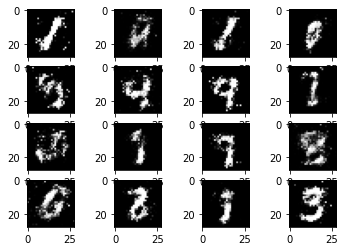

[7/200, 100/938] D_loss: 0.543 G_loss: 1.583
[7/200, 200/938] D_loss: 0.555 G_loss: 1.639
[7/200, 300/938] D_loss: 0.430 G_loss: 1.505
[7/200, 400/938] D_loss: 0.532 G_loss: 0.841
[7/200, 500/938] D_loss: 0.546 G_loss: 1.039
[7/200, 600/938] D_loss: 0.588 G_loss: 1.190
[7/200, 700/938] D_loss: 0.532 G_loss: 1.186
[7/200, 800/938] D_loss: 0.518 G_loss: 0.849
[7/200, 900/938] D_loss: 0.503 G_loss: 1.743
[7/200, 938/938] D_loss: 0.638 G_loss: 0.777


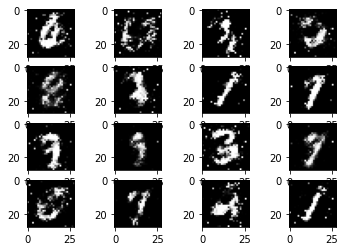

[8/200, 100/938] D_loss: 0.531 G_loss: 1.554
[8/200, 200/938] D_loss: 0.519 G_loss: 1.326
[8/200, 300/938] D_loss: 0.537 G_loss: 1.055
[8/200, 400/938] D_loss: 0.570 G_loss: 0.928
[8/200, 500/938] D_loss: 0.710 G_loss: 0.746
[8/200, 600/938] D_loss: 0.514 G_loss: 1.509
[8/200, 700/938] D_loss: 0.454 G_loss: 1.343
[8/200, 800/938] D_loss: 0.538 G_loss: 1.071
[8/200, 900/938] D_loss: 0.509 G_loss: 1.180
[8/200, 938/938] D_loss: 0.573 G_loss: 0.823


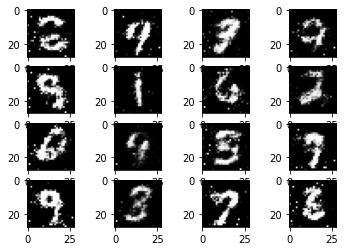

[9/200, 100/938] D_loss: 0.570 G_loss: 0.669
[9/200, 200/938] D_loss: 0.544 G_loss: 0.881
[9/200, 300/938] D_loss: 0.578 G_loss: 1.321
[9/200, 400/938] D_loss: 0.582 G_loss: 1.466
[9/200, 500/938] D_loss: 0.552 G_loss: 1.090
[9/200, 600/938] D_loss: 0.518 G_loss: 0.752
[9/200, 700/938] D_loss: 0.589 G_loss: 1.036
[9/200, 800/938] D_loss: 0.571 G_loss: 1.057
[9/200, 900/938] D_loss: 0.566 G_loss: 1.069
[9/200, 938/938] D_loss: 0.673 G_loss: 1.195


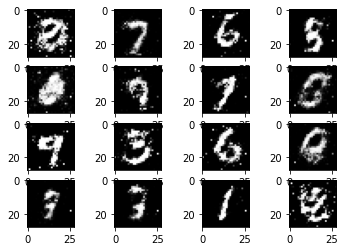

[10/200, 100/938] D_loss: 0.579 G_loss: 1.043
[10/200, 200/938] D_loss: 0.625 G_loss: 1.559
[10/200, 300/938] D_loss: 0.606 G_loss: 1.363
[10/200, 400/938] D_loss: 0.600 G_loss: 1.186
[10/200, 500/938] D_loss: 0.587 G_loss: 1.227
[10/200, 600/938] D_loss: 0.585 G_loss: 0.996
[10/200, 700/938] D_loss: 0.603 G_loss: 0.957
[10/200, 800/938] D_loss: 0.661 G_loss: 0.612
[10/200, 900/938] D_loss: 0.596 G_loss: 1.052
[10/200, 938/938] D_loss: 0.633 G_loss: 1.448


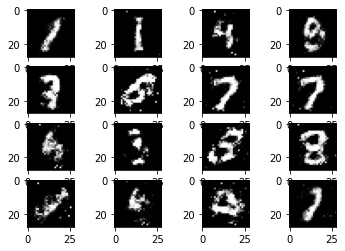

[11/200, 100/938] D_loss: 0.722 G_loss: 0.508
[11/200, 200/938] D_loss: 0.612 G_loss: 1.184
[11/200, 300/938] D_loss: 0.593 G_loss: 0.717
[11/200, 400/938] D_loss: 0.577 G_loss: 1.022
[11/200, 500/938] D_loss: 0.546 G_loss: 0.979
[11/200, 600/938] D_loss: 0.581 G_loss: 0.802
[11/200, 700/938] D_loss: 0.591 G_loss: 0.951
[11/200, 800/938] D_loss: 0.649 G_loss: 0.634
[11/200, 900/938] D_loss: 0.630 G_loss: 0.649
[11/200, 938/938] D_loss: 0.589 G_loss: 0.788


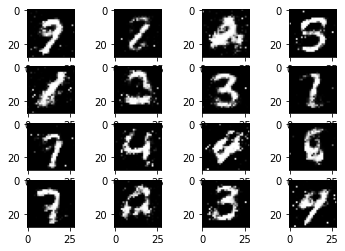

[12/200, 100/938] D_loss: 0.622 G_loss: 1.306
[12/200, 200/938] D_loss: 0.668 G_loss: 0.561
[12/200, 300/938] D_loss: 0.632 G_loss: 1.232
[12/200, 400/938] D_loss: 0.594 G_loss: 1.009
[12/200, 500/938] D_loss: 0.597 G_loss: 1.030
[12/200, 600/938] D_loss: 0.673 G_loss: 0.638
[12/200, 700/938] D_loss: 0.628 G_loss: 0.750
[12/200, 800/938] D_loss: 0.607 G_loss: 0.785
[12/200, 900/938] D_loss: 0.663 G_loss: 0.587
[12/200, 938/938] D_loss: 0.604 G_loss: 0.929


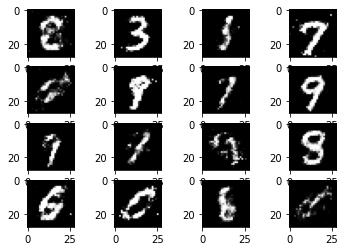

[13/200, 100/938] D_loss: 0.575 G_loss: 1.146
[13/200, 200/938] D_loss: 0.583 G_loss: 0.801
[13/200, 300/938] D_loss: 0.639 G_loss: 0.681
[13/200, 400/938] D_loss: 0.627 G_loss: 0.721
[13/200, 500/938] D_loss: 0.619 G_loss: 0.923
[13/200, 600/938] D_loss: 0.602 G_loss: 0.929
[13/200, 700/938] D_loss: 0.620 G_loss: 0.866
[13/200, 800/938] D_loss: 0.649 G_loss: 0.805
[13/200, 900/938] D_loss: 0.566 G_loss: 1.103
[13/200, 938/938] D_loss: 0.681 G_loss: 0.811


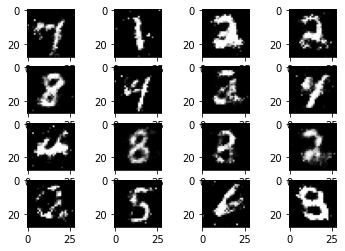

[14/200, 100/938] D_loss: 0.655 G_loss: 0.730
[14/200, 200/938] D_loss: 0.595 G_loss: 0.810
[14/200, 300/938] D_loss: 0.613 G_loss: 1.016
[14/200, 400/938] D_loss: 0.624 G_loss: 0.739
[14/200, 500/938] D_loss: 0.617 G_loss: 0.939
[14/200, 600/938] D_loss: 0.629 G_loss: 1.122
[14/200, 700/938] D_loss: 0.659 G_loss: 1.005
[14/200, 800/938] D_loss: 0.653 G_loss: 0.990
[14/200, 900/938] D_loss: 0.577 G_loss: 0.908
[14/200, 938/938] D_loss: 0.676 G_loss: 0.986


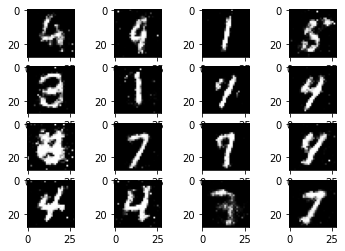

[15/200, 100/938] D_loss: 0.644 G_loss: 0.767
[15/200, 200/938] D_loss: 0.658 G_loss: 0.615
[15/200, 300/938] D_loss: 0.713 G_loss: 1.242
[15/200, 400/938] D_loss: 0.653 G_loss: 0.734
[15/200, 500/938] D_loss: 0.630 G_loss: 0.950
[15/200, 600/938] D_loss: 0.603 G_loss: 0.936
[15/200, 700/938] D_loss: 0.674 G_loss: 0.652
[15/200, 800/938] D_loss: 0.681 G_loss: 0.935
[15/200, 900/938] D_loss: 0.634 G_loss: 1.026
[15/200, 938/938] D_loss: 0.617 G_loss: 1.238


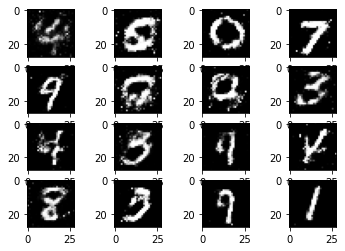

[16/200, 100/938] D_loss: 0.634 G_loss: 0.864
[16/200, 200/938] D_loss: 0.632 G_loss: 0.590
[16/200, 300/938] D_loss: 0.627 G_loss: 0.863
[16/200, 400/938] D_loss: 0.638 G_loss: 0.710
[16/200, 500/938] D_loss: 0.638 G_loss: 0.967
[16/200, 600/938] D_loss: 0.610 G_loss: 0.732
[16/200, 700/938] D_loss: 0.612 G_loss: 0.903
[16/200, 800/938] D_loss: 0.666 G_loss: 0.710
[16/200, 900/938] D_loss: 0.667 G_loss: 0.808
[16/200, 938/938] D_loss: 0.650 G_loss: 0.939


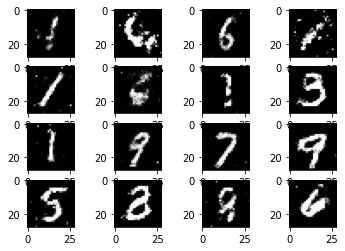

[17/200, 100/938] D_loss: 0.624 G_loss: 0.702
[17/200, 200/938] D_loss: 0.651 G_loss: 0.940
[17/200, 300/938] D_loss: 0.684 G_loss: 0.896
[17/200, 400/938] D_loss: 0.641 G_loss: 0.816
[17/200, 500/938] D_loss: 0.606 G_loss: 0.836
[17/200, 600/938] D_loss: 0.655 G_loss: 0.676
[17/200, 700/938] D_loss: 0.631 G_loss: 0.906
[17/200, 800/938] D_loss: 0.635 G_loss: 0.662
[17/200, 900/938] D_loss: 0.635 G_loss: 0.651
[17/200, 938/938] D_loss: 0.595 G_loss: 0.819


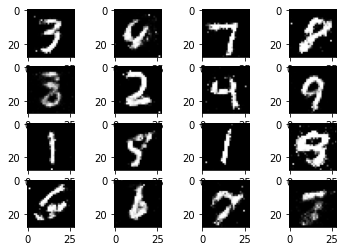

[18/200, 100/938] D_loss: 0.607 G_loss: 0.682
[18/200, 200/938] D_loss: 0.619 G_loss: 0.811
[18/200, 300/938] D_loss: 0.634 G_loss: 0.614
[18/200, 400/938] D_loss: 0.654 G_loss: 0.911
[18/200, 500/938] D_loss: 0.641 G_loss: 0.724
[18/200, 600/938] D_loss: 0.710 G_loss: 0.761
[18/200, 700/938] D_loss: 0.606 G_loss: 0.997
[18/200, 800/938] D_loss: 0.641 G_loss: 0.987
[18/200, 900/938] D_loss: 0.653 G_loss: 0.894
[18/200, 938/938] D_loss: 0.639 G_loss: 0.650


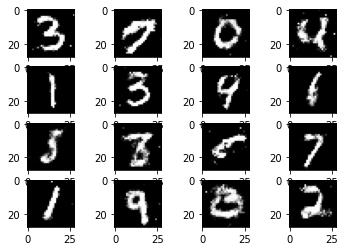

[19/200, 100/938] D_loss: 0.655 G_loss: 0.880
[19/200, 200/938] D_loss: 0.683 G_loss: 0.674
[19/200, 300/938] D_loss: 0.628 G_loss: 0.750
[19/200, 400/938] D_loss: 0.660 G_loss: 0.680
[19/200, 500/938] D_loss: 0.610 G_loss: 0.993
[19/200, 600/938] D_loss: 0.609 G_loss: 0.967
[19/200, 700/938] D_loss: 0.683 G_loss: 0.854
[19/200, 800/938] D_loss: 0.633 G_loss: 0.950
[19/200, 900/938] D_loss: 0.648 G_loss: 0.867
[19/200, 938/938] D_loss: 0.669 G_loss: 0.860


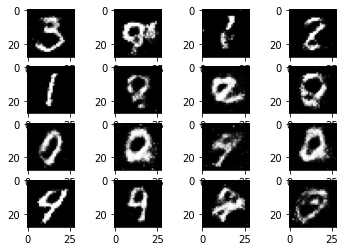

[20/200, 100/938] D_loss: 0.632 G_loss: 0.732
[20/200, 200/938] D_loss: 0.669 G_loss: 0.941
[20/200, 300/938] D_loss: 0.654 G_loss: 0.874
[20/200, 400/938] D_loss: 0.612 G_loss: 0.887
[20/200, 500/938] D_loss: 0.624 G_loss: 1.074
[20/200, 600/938] D_loss: 0.667 G_loss: 0.776
[20/200, 700/938] D_loss: 0.597 G_loss: 1.047
[20/200, 800/938] D_loss: 0.638 G_loss: 0.900
[20/200, 900/938] D_loss: 0.605 G_loss: 0.885
[20/200, 938/938] D_loss: 0.597 G_loss: 0.710


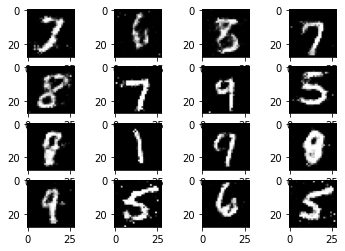

[21/200, 100/938] D_loss: 0.701 G_loss: 1.049
[21/200, 200/938] D_loss: 0.646 G_loss: 0.644
[21/200, 300/938] D_loss: 0.688 G_loss: 0.604
[21/200, 400/938] D_loss: 0.642 G_loss: 0.925
[21/200, 500/938] D_loss: 0.645 G_loss: 0.757
[21/200, 600/938] D_loss: 0.654 G_loss: 0.967
[21/200, 700/938] D_loss: 0.669 G_loss: 0.977
[21/200, 800/938] D_loss: 0.688 G_loss: 0.607
[21/200, 900/938] D_loss: 0.660 G_loss: 0.674
[21/200, 938/938] D_loss: 0.664 G_loss: 0.930


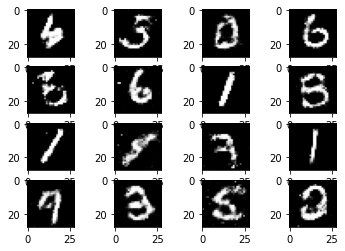

[22/200, 100/938] D_loss: 0.607 G_loss: 0.900
[22/200, 200/938] D_loss: 0.643 G_loss: 0.795
[22/200, 300/938] D_loss: 0.609 G_loss: 0.951
[22/200, 400/938] D_loss: 0.667 G_loss: 1.156
[22/200, 500/938] D_loss: 0.625 G_loss: 0.818
[22/200, 600/938] D_loss: 0.636 G_loss: 0.700
[22/200, 700/938] D_loss: 0.610 G_loss: 0.761
[22/200, 800/938] D_loss: 0.657 G_loss: 1.065
[22/200, 900/938] D_loss: 0.627 G_loss: 0.792
[22/200, 938/938] D_loss: 0.605 G_loss: 0.815


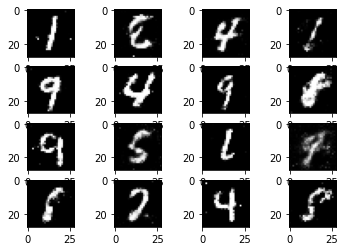

[23/200, 100/938] D_loss: 0.625 G_loss: 0.667
[23/200, 200/938] D_loss: 0.651 G_loss: 0.799
[23/200, 300/938] D_loss: 0.637 G_loss: 0.898
[23/200, 400/938] D_loss: 0.706 G_loss: 0.781
[23/200, 500/938] D_loss: 0.603 G_loss: 0.773
[23/200, 600/938] D_loss: 0.654 G_loss: 0.740
[23/200, 700/938] D_loss: 0.651 G_loss: 1.008
[23/200, 800/938] D_loss: 0.679 G_loss: 1.050
[23/200, 900/938] D_loss: 0.635 G_loss: 0.710
[23/200, 938/938] D_loss: 0.628 G_loss: 0.755


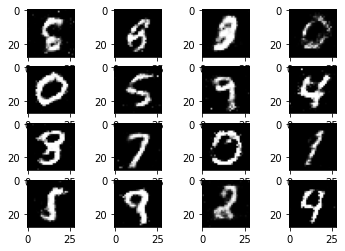

[24/200, 100/938] D_loss: 0.663 G_loss: 0.882
[24/200, 200/938] D_loss: 0.627 G_loss: 0.828
[24/200, 300/938] D_loss: 0.655 G_loss: 0.638
[24/200, 400/938] D_loss: 0.631 G_loss: 0.762
[24/200, 500/938] D_loss: 0.658 G_loss: 0.695
[24/200, 600/938] D_loss: 0.700 G_loss: 0.924
[24/200, 700/938] D_loss: 0.686 G_loss: 1.012
[24/200, 800/938] D_loss: 0.661 G_loss: 0.957
[24/200, 900/938] D_loss: 0.659 G_loss: 0.771
[24/200, 938/938] D_loss: 0.624 G_loss: 0.903


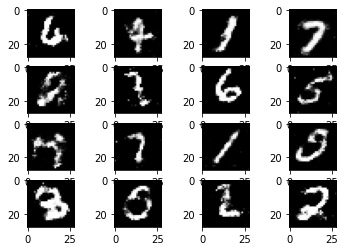

[25/200, 100/938] D_loss: 0.662 G_loss: 0.751
[25/200, 200/938] D_loss: 0.622 G_loss: 0.871
[25/200, 300/938] D_loss: 0.644 G_loss: 0.899
[25/200, 400/938] D_loss: 0.658 G_loss: 0.795
[25/200, 500/938] D_loss: 0.637 G_loss: 0.723
[25/200, 600/938] D_loss: 0.648 G_loss: 0.744
[25/200, 700/938] D_loss: 0.623 G_loss: 0.925
[25/200, 800/938] D_loss: 0.623 G_loss: 0.949
[25/200, 900/938] D_loss: 0.588 G_loss: 1.082
[25/200, 938/938] D_loss: 0.659 G_loss: 0.935


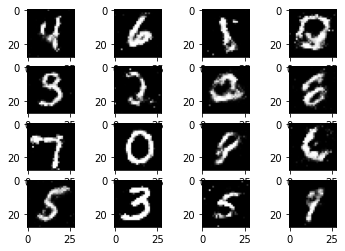

[26/200, 100/938] D_loss: 0.631 G_loss: 0.925
[26/200, 200/938] D_loss: 0.647 G_loss: 1.136
[26/200, 300/938] D_loss: 0.600 G_loss: 1.009
[26/200, 400/938] D_loss: 0.645 G_loss: 0.660
[26/200, 500/938] D_loss: 0.612 G_loss: 0.866
[26/200, 600/938] D_loss: 0.599 G_loss: 0.883
[26/200, 700/938] D_loss: 0.633 G_loss: 1.001
[26/200, 800/938] D_loss: 0.666 G_loss: 0.700
[26/200, 900/938] D_loss: 0.650 G_loss: 0.810
[26/200, 938/938] D_loss: 0.648 G_loss: 0.782


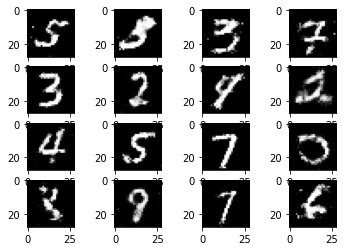

[27/200, 100/938] D_loss: 0.625 G_loss: 0.678
[27/200, 200/938] D_loss: 0.631 G_loss: 1.141
[27/200, 300/938] D_loss: 0.650 G_loss: 0.663
[27/200, 400/938] D_loss: 0.704 G_loss: 0.632
[27/200, 500/938] D_loss: 0.684 G_loss: 0.729
[27/200, 600/938] D_loss: 0.653 G_loss: 1.088
[27/200, 700/938] D_loss: 0.633 G_loss: 0.702
[27/200, 800/938] D_loss: 0.632 G_loss: 0.905
[27/200, 900/938] D_loss: 0.648 G_loss: 0.953
[27/200, 938/938] D_loss: 0.629 G_loss: 0.896


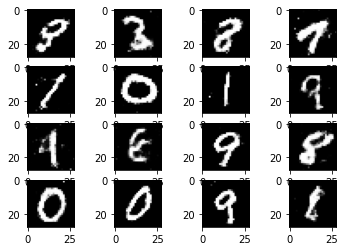

[28/200, 100/938] D_loss: 0.636 G_loss: 0.644
[28/200, 200/938] D_loss: 0.638 G_loss: 1.035
[28/200, 300/938] D_loss: 0.618 G_loss: 1.026
[28/200, 400/938] D_loss: 0.644 G_loss: 0.783
[28/200, 500/938] D_loss: 0.648 G_loss: 0.977
[28/200, 600/938] D_loss: 0.586 G_loss: 0.836
[28/200, 700/938] D_loss: 0.652 G_loss: 1.009
[28/200, 800/938] D_loss: 0.652 G_loss: 0.926
[28/200, 900/938] D_loss: 0.666 G_loss: 0.636
[28/200, 938/938] D_loss: 0.662 G_loss: 0.904


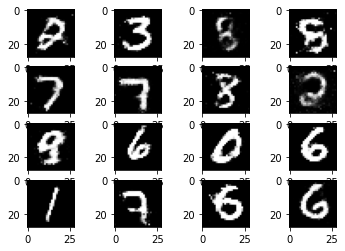

[29/200, 100/938] D_loss: 0.656 G_loss: 1.009
[29/200, 200/938] D_loss: 0.688 G_loss: 0.914
[29/200, 300/938] D_loss: 0.620 G_loss: 0.972
[29/200, 400/938] D_loss: 0.616 G_loss: 0.909
[29/200, 500/938] D_loss: 0.628 G_loss: 1.143
[29/200, 600/938] D_loss: 0.633 G_loss: 0.744
[29/200, 700/938] D_loss: 0.677 G_loss: 0.880
[29/200, 800/938] D_loss: 0.695 G_loss: 0.709
[29/200, 900/938] D_loss: 0.695 G_loss: 1.089
[29/200, 938/938] D_loss: 0.635 G_loss: 0.882


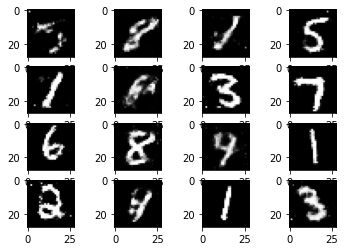

[30/200, 100/938] D_loss: 0.616 G_loss: 0.936
[30/200, 200/938] D_loss: 0.649 G_loss: 0.850
[30/200, 300/938] D_loss: 0.618 G_loss: 1.020
[30/200, 400/938] D_loss: 0.622 G_loss: 0.930
[30/200, 500/938] D_loss: 0.685 G_loss: 0.806
[30/200, 600/938] D_loss: 0.647 G_loss: 0.812
[30/200, 700/938] D_loss: 0.611 G_loss: 0.954
[30/200, 800/938] D_loss: 0.626 G_loss: 0.714
[30/200, 900/938] D_loss: 0.643 G_loss: 0.920
[30/200, 938/938] D_loss: 0.662 G_loss: 0.639


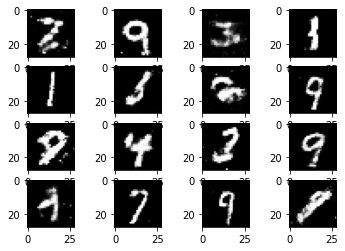

[31/200, 100/938] D_loss: 0.684 G_loss: 1.147
[31/200, 200/938] D_loss: 0.717 G_loss: 1.028
[31/200, 300/938] D_loss: 0.638 G_loss: 0.778
[31/200, 400/938] D_loss: 0.651 G_loss: 0.833
[31/200, 500/938] D_loss: 0.645 G_loss: 0.831
[31/200, 600/938] D_loss: 0.623 G_loss: 0.864
[31/200, 700/938] D_loss: 0.632 G_loss: 0.719
[31/200, 800/938] D_loss: 0.640 G_loss: 0.865
[31/200, 900/938] D_loss: 0.647 G_loss: 0.853
[31/200, 938/938] D_loss: 0.656 G_loss: 0.996


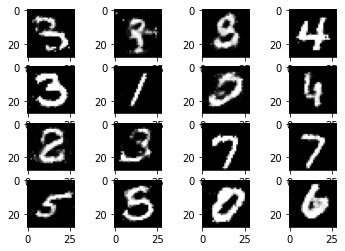

[32/200, 100/938] D_loss: 0.649 G_loss: 0.686
[32/200, 200/938] D_loss: 0.616 G_loss: 0.776
[32/200, 300/938] D_loss: 0.623 G_loss: 0.754
[32/200, 400/938] D_loss: 0.645 G_loss: 0.725
[32/200, 500/938] D_loss: 0.603 G_loss: 1.062
[32/200, 600/938] D_loss: 0.641 G_loss: 0.798
[32/200, 700/938] D_loss: 0.687 G_loss: 0.730
[32/200, 800/938] D_loss: 0.640 G_loss: 0.905
[32/200, 900/938] D_loss: 0.681 G_loss: 0.818
[32/200, 938/938] D_loss: 0.621 G_loss: 0.931


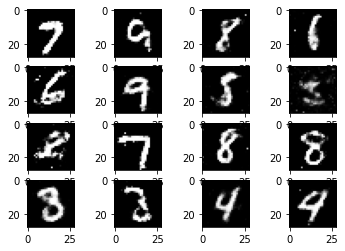

[33/200, 100/938] D_loss: 0.597 G_loss: 0.820
[33/200, 200/938] D_loss: 0.643 G_loss: 0.740
[33/200, 300/938] D_loss: 0.622 G_loss: 1.055
[33/200, 400/938] D_loss: 0.646 G_loss: 0.790
[33/200, 500/938] D_loss: 0.637 G_loss: 0.904
[33/200, 600/938] D_loss: 0.672 G_loss: 1.011
[33/200, 700/938] D_loss: 0.610 G_loss: 0.958
[33/200, 800/938] D_loss: 0.596 G_loss: 0.775
[33/200, 900/938] D_loss: 0.661 G_loss: 0.793
[33/200, 938/938] D_loss: 0.639 G_loss: 0.750


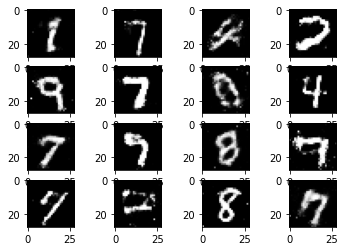

[34/200, 100/938] D_loss: 0.641 G_loss: 0.722
[34/200, 200/938] D_loss: 0.673 G_loss: 0.918
[34/200, 300/938] D_loss: 0.614 G_loss: 0.819
[34/200, 400/938] D_loss: 0.661 G_loss: 0.862
[34/200, 500/938] D_loss: 0.656 G_loss: 0.958
[34/200, 600/938] D_loss: 0.694 G_loss: 0.787
[34/200, 700/938] D_loss: 0.615 G_loss: 0.894
[34/200, 800/938] D_loss: 0.677 G_loss: 0.648
[34/200, 900/938] D_loss: 0.636 G_loss: 0.861
[34/200, 938/938] D_loss: 0.630 G_loss: 0.928


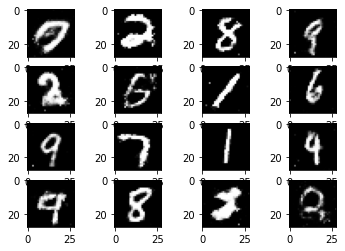

[35/200, 100/938] D_loss: 0.659 G_loss: 0.625
[35/200, 200/938] D_loss: 0.594 G_loss: 0.831
[35/200, 300/938] D_loss: 0.644 G_loss: 0.729
[35/200, 400/938] D_loss: 0.646 G_loss: 1.088
[35/200, 500/938] D_loss: 0.633 G_loss: 0.822
[35/200, 600/938] D_loss: 0.648 G_loss: 0.892
[35/200, 700/938] D_loss: 0.666 G_loss: 0.862
[35/200, 800/938] D_loss: 0.614 G_loss: 0.969
[35/200, 900/938] D_loss: 0.640 G_loss: 0.768
[35/200, 938/938] D_loss: 0.642 G_loss: 0.867


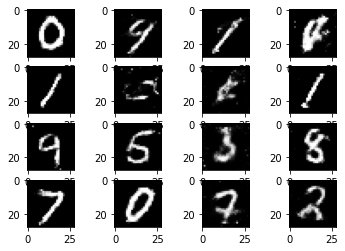

[36/200, 100/938] D_loss: 0.642 G_loss: 0.969
[36/200, 200/938] D_loss: 0.632 G_loss: 0.974
[36/200, 300/938] D_loss: 0.648 G_loss: 1.048
[36/200, 400/938] D_loss: 0.638 G_loss: 0.671
[36/200, 500/938] D_loss: 0.641 G_loss: 0.637
[36/200, 600/938] D_loss: 0.661 G_loss: 0.942
[36/200, 700/938] D_loss: 0.686 G_loss: 1.061
[36/200, 800/938] D_loss: 0.631 G_loss: 0.886
[36/200, 900/938] D_loss: 0.611 G_loss: 0.868
[36/200, 938/938] D_loss: 0.648 G_loss: 0.916


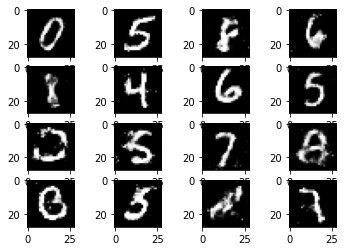

[37/200, 100/938] D_loss: 0.685 G_loss: 0.938
[37/200, 200/938] D_loss: 0.671 G_loss: 0.979
[37/200, 300/938] D_loss: 0.623 G_loss: 0.947
[37/200, 400/938] D_loss: 0.630 G_loss: 0.755
[37/200, 500/938] D_loss: 0.661 G_loss: 0.624
[37/200, 600/938] D_loss: 0.637 G_loss: 0.922
[37/200, 700/938] D_loss: 0.655 G_loss: 0.702
[37/200, 800/938] D_loss: 0.658 G_loss: 0.999
[37/200, 900/938] D_loss: 0.666 G_loss: 0.770
[37/200, 938/938] D_loss: 0.694 G_loss: 0.902


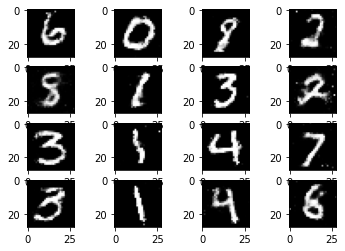

[38/200, 100/938] D_loss: 0.619 G_loss: 1.113
[38/200, 200/938] D_loss: 0.637 G_loss: 0.895
[38/200, 300/938] D_loss: 0.662 G_loss: 0.711
[38/200, 400/938] D_loss: 0.662 G_loss: 0.805
[38/200, 500/938] D_loss: 0.657 G_loss: 0.849
[38/200, 600/938] D_loss: 0.648 G_loss: 0.837
[38/200, 700/938] D_loss: 0.606 G_loss: 0.902
[38/200, 800/938] D_loss: 0.615 G_loss: 0.925
[38/200, 900/938] D_loss: 0.620 G_loss: 1.009
[38/200, 938/938] D_loss: 0.597 G_loss: 0.846


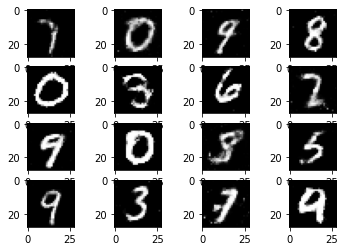

[39/200, 100/938] D_loss: 0.617 G_loss: 0.739
[39/200, 200/938] D_loss: 0.614 G_loss: 0.989
[39/200, 300/938] D_loss: 0.594 G_loss: 0.774
[39/200, 400/938] D_loss: 0.589 G_loss: 1.002
[39/200, 500/938] D_loss: 0.651 G_loss: 0.750
[39/200, 600/938] D_loss: 0.673 G_loss: 0.713
[39/200, 700/938] D_loss: 0.635 G_loss: 0.708
[39/200, 800/938] D_loss: 0.603 G_loss: 0.809
[39/200, 900/938] D_loss: 0.614 G_loss: 0.990
[39/200, 938/938] D_loss: 0.608 G_loss: 0.816


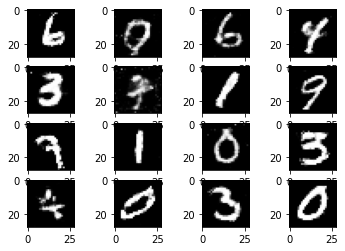

[40/200, 100/938] D_loss: 0.653 G_loss: 0.800
[40/200, 200/938] D_loss: 0.636 G_loss: 0.796
[40/200, 300/938] D_loss: 0.639 G_loss: 0.807
[40/200, 400/938] D_loss: 0.648 G_loss: 0.947
[40/200, 500/938] D_loss: 0.662 G_loss: 0.941
[40/200, 600/938] D_loss: 0.637 G_loss: 0.836
[40/200, 700/938] D_loss: 0.620 G_loss: 0.764
[40/200, 800/938] D_loss: 0.636 G_loss: 0.822
[40/200, 900/938] D_loss: 0.589 G_loss: 0.961
[40/200, 938/938] D_loss: 0.581 G_loss: 1.002


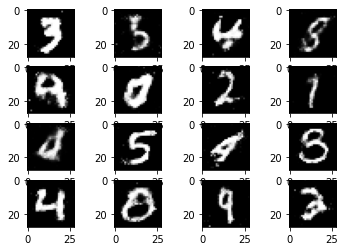

[41/200, 100/938] D_loss: 0.655 G_loss: 0.672
[41/200, 200/938] D_loss: 0.663 G_loss: 0.860
[41/200, 300/938] D_loss: 0.658 G_loss: 0.633
[41/200, 400/938] D_loss: 0.629 G_loss: 0.882
[41/200, 500/938] D_loss: 0.632 G_loss: 1.023
[41/200, 600/938] D_loss: 0.631 G_loss: 0.777
[41/200, 700/938] D_loss: 0.649 G_loss: 0.808
[41/200, 800/938] D_loss: 0.651 G_loss: 0.897
[41/200, 900/938] D_loss: 0.709 G_loss: 0.667
[41/200, 938/938] D_loss: 0.655 G_loss: 0.876


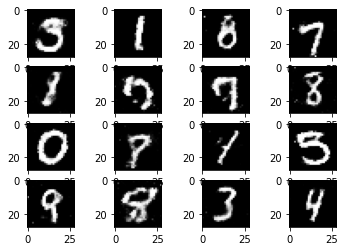

[42/200, 100/938] D_loss: 0.646 G_loss: 0.911
[42/200, 200/938] D_loss: 0.685 G_loss: 0.940
[42/200, 300/938] D_loss: 0.643 G_loss: 0.965
[42/200, 400/938] D_loss: 0.663 G_loss: 0.893
[42/200, 500/938] D_loss: 0.610 G_loss: 1.016
[42/200, 600/938] D_loss: 0.606 G_loss: 0.855
[42/200, 700/938] D_loss: 0.592 G_loss: 0.898
[42/200, 800/938] D_loss: 0.624 G_loss: 0.714
[42/200, 900/938] D_loss: 0.715 G_loss: 0.909
[42/200, 938/938] D_loss: 0.652 G_loss: 0.648


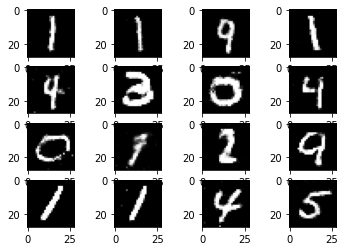

[43/200, 100/938] D_loss: 0.614 G_loss: 1.142
[43/200, 200/938] D_loss: 0.635 G_loss: 0.844
[43/200, 300/938] D_loss: 0.665 G_loss: 0.814
[43/200, 400/938] D_loss: 0.677 G_loss: 0.783
[43/200, 500/938] D_loss: 0.586 G_loss: 0.961
[43/200, 600/938] D_loss: 0.629 G_loss: 0.901
[43/200, 700/938] D_loss: 0.635 G_loss: 0.974
[43/200, 800/938] D_loss: 0.645 G_loss: 0.789
[43/200, 900/938] D_loss: 0.639 G_loss: 1.038
[43/200, 938/938] D_loss: 0.684 G_loss: 0.869


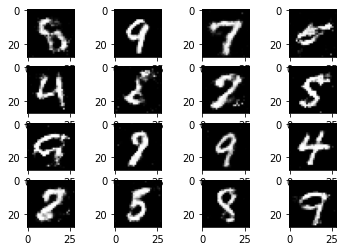

[44/200, 100/938] D_loss: 0.640 G_loss: 0.925
[44/200, 200/938] D_loss: 0.623 G_loss: 0.988
[44/200, 300/938] D_loss: 0.661 G_loss: 0.886
[44/200, 400/938] D_loss: 0.633 G_loss: 0.641
[44/200, 500/938] D_loss: 0.581 G_loss: 0.939
[44/200, 600/938] D_loss: 0.591 G_loss: 0.849
[44/200, 700/938] D_loss: 0.619 G_loss: 0.892
[44/200, 800/938] D_loss: 0.700 G_loss: 0.844
[44/200, 900/938] D_loss: 0.639 G_loss: 0.792
[44/200, 938/938] D_loss: 0.602 G_loss: 0.900


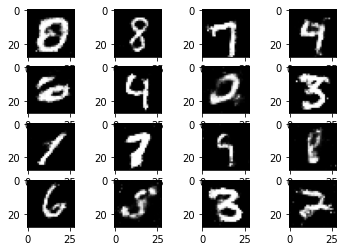

[45/200, 100/938] D_loss: 0.629 G_loss: 0.722
[45/200, 200/938] D_loss: 0.649 G_loss: 0.989
[45/200, 300/938] D_loss: 0.601 G_loss: 0.943
[45/200, 400/938] D_loss: 0.607 G_loss: 0.894
[45/200, 500/938] D_loss: 0.681 G_loss: 0.925
[45/200, 600/938] D_loss: 0.611 G_loss: 0.807
[45/200, 700/938] D_loss: 0.660 G_loss: 0.926
[45/200, 800/938] D_loss: 0.642 G_loss: 0.868
[45/200, 900/938] D_loss: 0.675 G_loss: 0.762
[45/200, 938/938] D_loss: 0.662 G_loss: 1.164


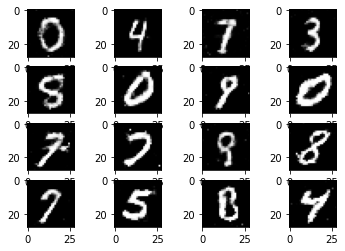

[46/200, 100/938] D_loss: 0.651 G_loss: 0.885
[46/200, 200/938] D_loss: 0.633 G_loss: 0.843
[46/200, 300/938] D_loss: 0.616 G_loss: 0.763
[46/200, 400/938] D_loss: 0.604 G_loss: 1.034
[46/200, 500/938] D_loss: 0.615 G_loss: 0.813
[46/200, 600/938] D_loss: 0.684 G_loss: 0.848
[46/200, 700/938] D_loss: 0.658 G_loss: 0.860
[46/200, 800/938] D_loss: 0.699 G_loss: 1.132
[46/200, 900/938] D_loss: 0.664 G_loss: 1.039
[46/200, 938/938] D_loss: 0.667 G_loss: 0.587


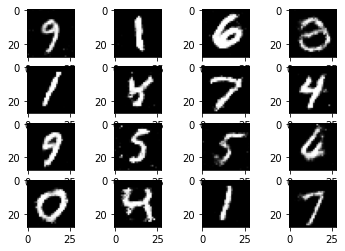

[47/200, 100/938] D_loss: 0.621 G_loss: 0.811
[47/200, 200/938] D_loss: 0.599 G_loss: 0.728
[47/200, 300/938] D_loss: 0.629 G_loss: 0.868
[47/200, 400/938] D_loss: 0.641 G_loss: 0.933
[47/200, 500/938] D_loss: 0.645 G_loss: 0.953
[47/200, 600/938] D_loss: 0.593 G_loss: 0.696
[47/200, 700/938] D_loss: 0.664 G_loss: 0.922
[47/200, 800/938] D_loss: 0.628 G_loss: 0.931
[47/200, 900/938] D_loss: 0.646 G_loss: 1.075
[47/200, 938/938] D_loss: 0.728 G_loss: 1.138


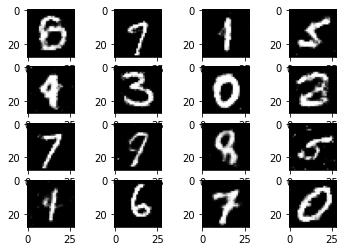

[48/200, 100/938] D_loss: 0.695 G_loss: 0.906
[48/200, 200/938] D_loss: 0.604 G_loss: 0.846
[48/200, 300/938] D_loss: 0.622 G_loss: 0.786
[48/200, 400/938] D_loss: 0.652 G_loss: 0.854
[48/200, 500/938] D_loss: 0.639 G_loss: 0.714
[48/200, 600/938] D_loss: 0.591 G_loss: 0.760
[48/200, 700/938] D_loss: 0.649 G_loss: 0.935
[48/200, 800/938] D_loss: 0.652 G_loss: 0.883
[48/200, 900/938] D_loss: 0.664 G_loss: 0.753
[48/200, 938/938] D_loss: 0.641 G_loss: 0.955


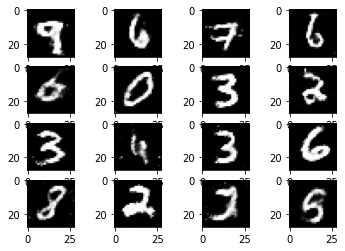

[49/200, 100/938] D_loss: 0.638 G_loss: 0.841
[49/200, 200/938] D_loss: 0.621 G_loss: 1.017
[49/200, 300/938] D_loss: 0.614 G_loss: 0.742
[49/200, 400/938] D_loss: 0.661 G_loss: 0.843
[49/200, 500/938] D_loss: 0.610 G_loss: 0.765
[49/200, 600/938] D_loss: 0.621 G_loss: 1.006
[49/200, 700/938] D_loss: 0.601 G_loss: 0.924
[49/200, 800/938] D_loss: 0.589 G_loss: 1.044
[49/200, 900/938] D_loss: 0.644 G_loss: 0.904
[49/200, 938/938] D_loss: 0.582 G_loss: 0.809


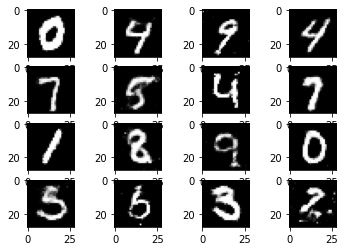

[50/200, 100/938] D_loss: 0.641 G_loss: 0.824
[50/200, 200/938] D_loss: 0.620 G_loss: 0.863
[50/200, 300/938] D_loss: 0.638 G_loss: 0.739
[50/200, 400/938] D_loss: 0.652 G_loss: 0.983
[50/200, 500/938] D_loss: 0.646 G_loss: 0.825
[50/200, 600/938] D_loss: 0.652 G_loss: 0.955
[50/200, 700/938] D_loss: 0.638 G_loss: 0.971
[50/200, 800/938] D_loss: 0.626 G_loss: 1.061
[50/200, 900/938] D_loss: 0.651 G_loss: 1.041
[50/200, 938/938] D_loss: 0.578 G_loss: 0.806


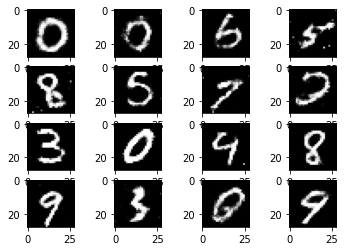

Model saved.
[51/200, 100/938] D_loss: 0.615 G_loss: 1.038
[51/200, 200/938] D_loss: 0.606 G_loss: 0.654
[51/200, 300/938] D_loss: 0.606 G_loss: 0.925
[51/200, 400/938] D_loss: 0.611 G_loss: 0.780
[51/200, 500/938] D_loss: 0.608 G_loss: 0.901
[51/200, 600/938] D_loss: 0.637 G_loss: 0.904
[51/200, 700/938] D_loss: 0.642 G_loss: 0.797
[51/200, 800/938] D_loss: 0.618 G_loss: 0.905
[51/200, 900/938] D_loss: 0.623 G_loss: 0.754
[51/200, 938/938] D_loss: 0.599 G_loss: 1.061


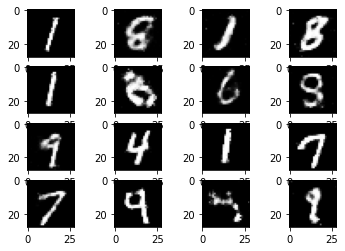

[52/200, 100/938] D_loss: 0.650 G_loss: 0.859
[52/200, 200/938] D_loss: 0.661 G_loss: 1.065
[52/200, 300/938] D_loss: 0.676 G_loss: 0.751
[52/200, 400/938] D_loss: 0.646 G_loss: 0.894
[52/200, 500/938] D_loss: 0.618 G_loss: 0.842
[52/200, 600/938] D_loss: 0.716 G_loss: 0.666
[52/200, 700/938] D_loss: 0.656 G_loss: 0.910
[52/200, 800/938] D_loss: 0.638 G_loss: 0.974
[52/200, 900/938] D_loss: 0.668 G_loss: 0.849
[52/200, 938/938] D_loss: 0.605 G_loss: 0.649


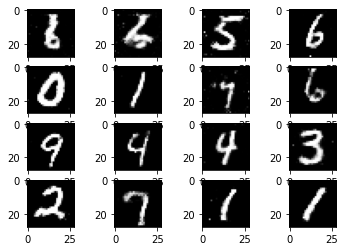

[53/200, 100/938] D_loss: 0.578 G_loss: 0.825
[53/200, 200/938] D_loss: 0.643 G_loss: 0.884
[53/200, 300/938] D_loss: 0.637 G_loss: 0.826
[53/200, 400/938] D_loss: 0.622 G_loss: 0.823
[53/200, 500/938] D_loss: 0.643 G_loss: 1.018
[53/200, 600/938] D_loss: 0.666 G_loss: 0.927
[53/200, 700/938] D_loss: 0.615 G_loss: 1.085
[53/200, 800/938] D_loss: 0.647 G_loss: 0.687
[53/200, 900/938] D_loss: 0.650 G_loss: 0.967
[53/200, 938/938] D_loss: 0.611 G_loss: 0.950


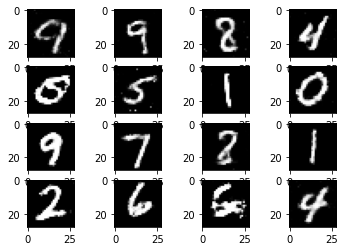

[54/200, 100/938] D_loss: 0.645 G_loss: 0.800
[54/200, 200/938] D_loss: 0.668 G_loss: 0.955
[54/200, 300/938] D_loss: 0.645 G_loss: 1.059
[54/200, 400/938] D_loss: 0.637 G_loss: 0.913
[54/200, 500/938] D_loss: 0.618 G_loss: 1.044
[54/200, 600/938] D_loss: 0.600 G_loss: 0.810
[54/200, 700/938] D_loss: 0.615 G_loss: 0.914
[54/200, 800/938] D_loss: 0.693 G_loss: 0.707
[54/200, 900/938] D_loss: 0.652 G_loss: 0.836
[54/200, 938/938] D_loss: 0.606 G_loss: 0.808


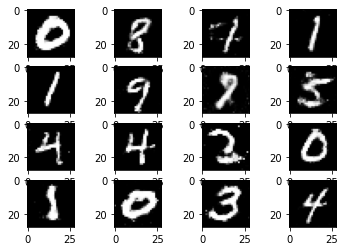

[55/200, 100/938] D_loss: 0.622 G_loss: 1.015
[55/200, 200/938] D_loss: 0.661 G_loss: 0.805
[55/200, 300/938] D_loss: 0.635 G_loss: 0.934
[55/200, 400/938] D_loss: 0.704 G_loss: 0.662
[55/200, 500/938] D_loss: 0.621 G_loss: 0.838
[55/200, 600/938] D_loss: 0.598 G_loss: 1.051
[55/200, 700/938] D_loss: 0.682 G_loss: 0.872
[55/200, 800/938] D_loss: 0.615 G_loss: 0.831
[55/200, 900/938] D_loss: 0.600 G_loss: 1.024
[55/200, 938/938] D_loss: 0.706 G_loss: 1.201


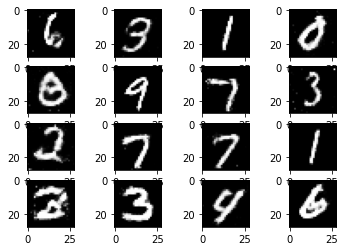

[56/200, 100/938] D_loss: 0.656 G_loss: 0.655
[56/200, 200/938] D_loss: 0.663 G_loss: 0.750
[56/200, 300/938] D_loss: 0.621 G_loss: 0.855
[56/200, 400/938] D_loss: 0.685 G_loss: 0.778
[56/200, 500/938] D_loss: 0.632 G_loss: 0.885
[56/200, 600/938] D_loss: 0.692 G_loss: 0.984
[56/200, 700/938] D_loss: 0.638 G_loss: 0.726
[56/200, 800/938] D_loss: 0.600 G_loss: 0.867
[56/200, 900/938] D_loss: 0.640 G_loss: 0.690
[56/200, 938/938] D_loss: 0.631 G_loss: 0.869


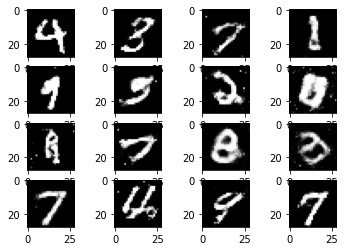

[57/200, 100/938] D_loss: 0.635 G_loss: 0.859
[57/200, 200/938] D_loss: 0.612 G_loss: 0.817
[57/200, 300/938] D_loss: 0.591 G_loss: 0.983
[57/200, 400/938] D_loss: 0.671 G_loss: 0.918
[57/200, 500/938] D_loss: 0.614 G_loss: 0.989
[57/200, 600/938] D_loss: 0.677 G_loss: 1.063
[57/200, 700/938] D_loss: 0.605 G_loss: 0.843
[57/200, 800/938] D_loss: 0.645 G_loss: 0.988
[57/200, 900/938] D_loss: 0.650 G_loss: 0.848
[57/200, 938/938] D_loss: 0.568 G_loss: 0.704


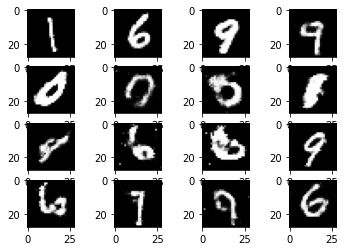

[58/200, 100/938] D_loss: 0.599 G_loss: 1.018
[58/200, 200/938] D_loss: 0.591 G_loss: 0.885
[58/200, 300/938] D_loss: 0.687 G_loss: 0.613
[58/200, 400/938] D_loss: 0.605 G_loss: 0.900
[58/200, 500/938] D_loss: 0.683 G_loss: 0.884
[58/200, 600/938] D_loss: 0.602 G_loss: 0.910
[58/200, 700/938] D_loss: 0.630 G_loss: 0.960
[58/200, 800/938] D_loss: 0.647 G_loss: 0.917
[58/200, 900/938] D_loss: 0.626 G_loss: 0.742
[58/200, 938/938] D_loss: 0.682 G_loss: 0.954


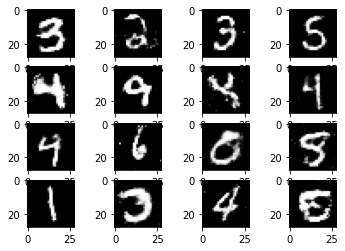

[59/200, 100/938] D_loss: 0.619 G_loss: 0.910
[59/200, 200/938] D_loss: 0.654 G_loss: 1.050
[59/200, 300/938] D_loss: 0.608 G_loss: 1.237
[59/200, 400/938] D_loss: 0.612 G_loss: 0.815
[59/200, 500/938] D_loss: 0.641 G_loss: 0.939
[59/200, 600/938] D_loss: 0.606 G_loss: 0.743
[59/200, 700/938] D_loss: 0.643 G_loss: 0.666
[59/200, 800/938] D_loss: 0.639 G_loss: 0.879
[59/200, 900/938] D_loss: 0.657 G_loss: 0.894
[59/200, 938/938] D_loss: 0.632 G_loss: 0.747


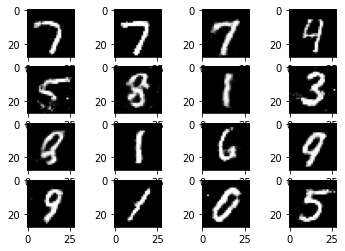

[60/200, 100/938] D_loss: 0.650 G_loss: 0.851
[60/200, 200/938] D_loss: 0.652 G_loss: 0.816
[60/200, 300/938] D_loss: 0.620 G_loss: 0.868
[60/200, 400/938] D_loss: 0.665 G_loss: 0.866
[60/200, 500/938] D_loss: 0.558 G_loss: 0.781
[60/200, 600/938] D_loss: 0.661 G_loss: 1.132
[60/200, 700/938] D_loss: 0.683 G_loss: 0.690
[60/200, 800/938] D_loss: 0.658 G_loss: 0.617
[60/200, 900/938] D_loss: 0.692 G_loss: 0.921
[60/200, 938/938] D_loss: 0.619 G_loss: 0.686


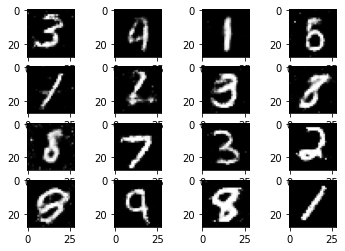

[61/200, 100/938] D_loss: 0.668 G_loss: 0.917
[61/200, 200/938] D_loss: 0.659 G_loss: 0.775
[61/200, 300/938] D_loss: 0.631 G_loss: 0.884
[61/200, 400/938] D_loss: 0.615 G_loss: 0.951
[61/200, 500/938] D_loss: 0.622 G_loss: 1.013
[61/200, 600/938] D_loss: 0.675 G_loss: 0.762
[61/200, 700/938] D_loss: 0.633 G_loss: 0.848
[61/200, 800/938] D_loss: 0.608 G_loss: 0.905
[61/200, 900/938] D_loss: 0.620 G_loss: 0.923
[61/200, 938/938] D_loss: 0.624 G_loss: 0.888


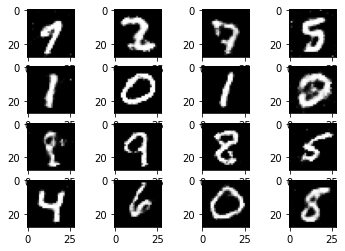

[62/200, 100/938] D_loss: 0.626 G_loss: 0.735
[62/200, 200/938] D_loss: 0.637 G_loss: 0.885
[62/200, 300/938] D_loss: 0.628 G_loss: 0.889
[62/200, 400/938] D_loss: 0.612 G_loss: 0.804
[62/200, 500/938] D_loss: 0.688 G_loss: 1.004
[62/200, 600/938] D_loss: 0.621 G_loss: 0.714
[62/200, 700/938] D_loss: 0.639 G_loss: 0.842
[62/200, 800/938] D_loss: 0.616 G_loss: 0.754
[62/200, 900/938] D_loss: 0.624 G_loss: 0.885
[62/200, 938/938] D_loss: 0.660 G_loss: 0.644


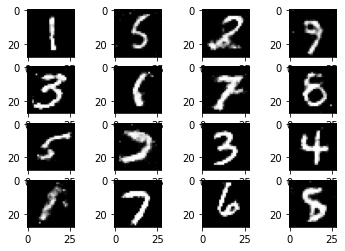

[63/200, 100/938] D_loss: 0.613 G_loss: 0.967
[63/200, 200/938] D_loss: 0.642 G_loss: 0.844
[63/200, 300/938] D_loss: 0.600 G_loss: 0.697
[63/200, 400/938] D_loss: 0.638 G_loss: 0.724
[63/200, 500/938] D_loss: 0.631 G_loss: 1.037
[63/200, 600/938] D_loss: 0.678 G_loss: 0.890
[63/200, 700/938] D_loss: 0.631 G_loss: 0.912
[63/200, 800/938] D_loss: 0.628 G_loss: 0.710
[63/200, 900/938] D_loss: 0.650 G_loss: 0.903
[63/200, 938/938] D_loss: 0.653 G_loss: 1.008


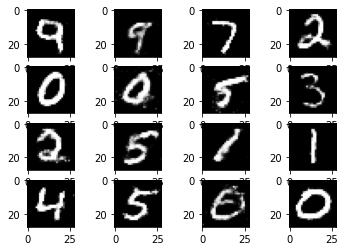

[64/200, 100/938] D_loss: 0.647 G_loss: 1.073
[64/200, 200/938] D_loss: 0.636 G_loss: 0.805
[64/200, 300/938] D_loss: 0.674 G_loss: 0.970
[64/200, 400/938] D_loss: 0.632 G_loss: 0.914
[64/200, 500/938] D_loss: 0.630 G_loss: 1.189
[64/200, 600/938] D_loss: 0.670 G_loss: 1.002
[64/200, 700/938] D_loss: 0.637 G_loss: 0.813
[64/200, 800/938] D_loss: 0.618 G_loss: 1.011
[64/200, 900/938] D_loss: 0.655 G_loss: 0.739
[64/200, 938/938] D_loss: 0.652 G_loss: 0.914


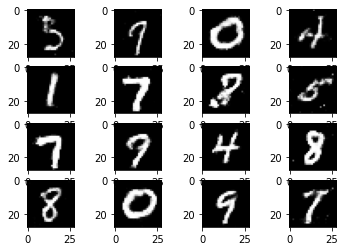

[65/200, 100/938] D_loss: 0.615 G_loss: 1.016
[65/200, 200/938] D_loss: 0.647 G_loss: 0.807
[65/200, 300/938] D_loss: 0.624 G_loss: 1.213
[65/200, 400/938] D_loss: 0.618 G_loss: 1.020
[65/200, 500/938] D_loss: 0.673 G_loss: 1.008
[65/200, 600/938] D_loss: 0.620 G_loss: 0.980
[65/200, 700/938] D_loss: 0.674 G_loss: 0.931
[65/200, 800/938] D_loss: 0.586 G_loss: 0.883
[65/200, 900/938] D_loss: 0.636 G_loss: 0.711
[65/200, 938/938] D_loss: 0.616 G_loss: 0.951


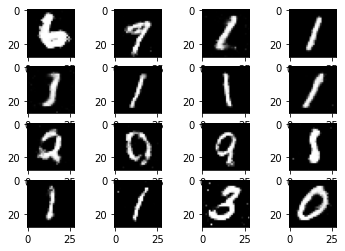

[66/200, 100/938] D_loss: 0.663 G_loss: 1.118
[66/200, 200/938] D_loss: 0.634 G_loss: 1.003
[66/200, 300/938] D_loss: 0.636 G_loss: 0.911
[66/200, 400/938] D_loss: 0.613 G_loss: 0.986
[66/200, 500/938] D_loss: 0.643 G_loss: 0.799
[66/200, 600/938] D_loss: 0.656 G_loss: 0.871
[66/200, 700/938] D_loss: 0.637 G_loss: 0.792
[66/200, 800/938] D_loss: 0.696 G_loss: 1.068
[66/200, 900/938] D_loss: 0.661 G_loss: 0.901
[66/200, 938/938] D_loss: 0.617 G_loss: 0.705


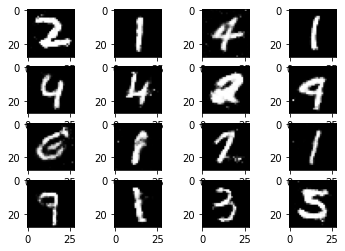

[67/200, 100/938] D_loss: 0.591 G_loss: 0.899
[67/200, 200/938] D_loss: 0.657 G_loss: 1.158
[67/200, 300/938] D_loss: 0.617 G_loss: 0.745
[67/200, 400/938] D_loss: 0.644 G_loss: 0.770
[67/200, 500/938] D_loss: 0.640 G_loss: 1.053
[67/200, 600/938] D_loss: 0.650 G_loss: 0.903
[67/200, 700/938] D_loss: 0.593 G_loss: 0.762
[67/200, 800/938] D_loss: 0.584 G_loss: 0.902
[67/200, 900/938] D_loss: 0.588 G_loss: 0.935
[67/200, 938/938] D_loss: 0.653 G_loss: 0.897


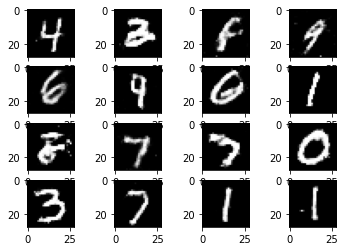

[68/200, 100/938] D_loss: 0.680 G_loss: 0.866
[68/200, 200/938] D_loss: 0.633 G_loss: 0.958
[68/200, 300/938] D_loss: 0.590 G_loss: 0.955
[68/200, 400/938] D_loss: 0.652 G_loss: 1.039
[68/200, 500/938] D_loss: 0.635 G_loss: 0.952
[68/200, 600/938] D_loss: 0.636 G_loss: 0.843
[68/200, 700/938] D_loss: 0.621 G_loss: 0.904
[68/200, 800/938] D_loss: 0.678 G_loss: 0.897
[68/200, 900/938] D_loss: 0.628 G_loss: 1.044
[68/200, 938/938] D_loss: 0.638 G_loss: 0.826


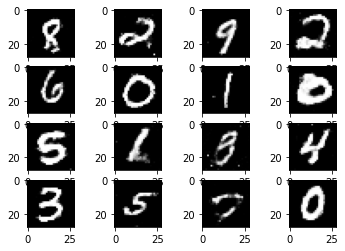

[69/200, 100/938] D_loss: 0.626 G_loss: 0.911
[69/200, 200/938] D_loss: 0.634 G_loss: 0.891
[69/200, 300/938] D_loss: 0.665 G_loss: 0.829
[69/200, 400/938] D_loss: 0.589 G_loss: 0.879
[69/200, 500/938] D_loss: 0.736 G_loss: 1.108
[69/200, 600/938] D_loss: 0.664 G_loss: 0.774
[69/200, 700/938] D_loss: 0.634 G_loss: 0.807
[69/200, 800/938] D_loss: 0.646 G_loss: 0.760
[69/200, 900/938] D_loss: 0.655 G_loss: 0.929
[69/200, 938/938] D_loss: 0.705 G_loss: 0.809


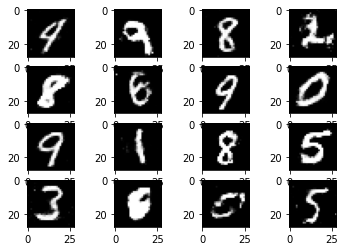

[70/200, 100/938] D_loss: 0.686 G_loss: 0.521
[70/200, 200/938] D_loss: 0.657 G_loss: 0.971
[70/200, 300/938] D_loss: 0.551 G_loss: 0.991
[70/200, 400/938] D_loss: 0.647 G_loss: 0.853
[70/200, 500/938] D_loss: 0.670 G_loss: 0.784
[70/200, 600/938] D_loss: 0.654 G_loss: 0.870
[70/200, 700/938] D_loss: 0.637 G_loss: 0.961
[70/200, 800/938] D_loss: 0.652 G_loss: 0.845
[70/200, 900/938] D_loss: 0.660 G_loss: 0.911
[70/200, 938/938] D_loss: 0.608 G_loss: 1.026


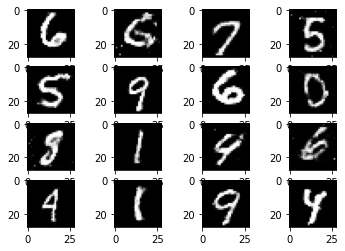

[71/200, 100/938] D_loss: 0.662 G_loss: 1.018
[71/200, 200/938] D_loss: 0.598 G_loss: 0.993
[71/200, 300/938] D_loss: 0.597 G_loss: 0.848
[71/200, 400/938] D_loss: 0.589 G_loss: 0.861
[71/200, 500/938] D_loss: 0.628 G_loss: 0.831
[71/200, 600/938] D_loss: 0.648 G_loss: 1.015
[71/200, 700/938] D_loss: 0.668 G_loss: 0.813
[71/200, 800/938] D_loss: 0.622 G_loss: 0.976
[71/200, 900/938] D_loss: 0.604 G_loss: 0.900
[71/200, 938/938] D_loss: 0.603 G_loss: 0.819


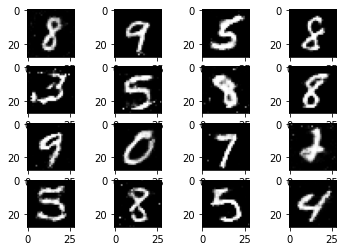

[72/200, 100/938] D_loss: 0.654 G_loss: 0.924
[72/200, 200/938] D_loss: 0.610 G_loss: 1.029
[72/200, 300/938] D_loss: 0.643 G_loss: 0.710
[72/200, 400/938] D_loss: 0.606 G_loss: 0.967
[72/200, 500/938] D_loss: 0.641 G_loss: 0.989
[72/200, 600/938] D_loss: 0.659 G_loss: 0.769
[72/200, 700/938] D_loss: 0.627 G_loss: 0.789
[72/200, 800/938] D_loss: 0.609 G_loss: 1.014
[72/200, 900/938] D_loss: 0.654 G_loss: 0.741
[72/200, 938/938] D_loss: 0.617 G_loss: 0.679


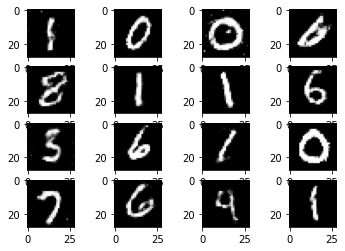

[73/200, 100/938] D_loss: 0.677 G_loss: 0.941
[73/200, 200/938] D_loss: 0.643 G_loss: 0.954
[73/200, 300/938] D_loss: 0.670 G_loss: 1.376
[73/200, 400/938] D_loss: 0.675 G_loss: 0.675
[73/200, 500/938] D_loss: 0.636 G_loss: 0.759
[73/200, 600/938] D_loss: 0.597 G_loss: 0.834
[73/200, 700/938] D_loss: 0.618 G_loss: 0.762
[73/200, 800/938] D_loss: 0.611 G_loss: 0.905
[73/200, 900/938] D_loss: 0.683 G_loss: 0.835
[73/200, 938/938] D_loss: 0.620 G_loss: 1.187


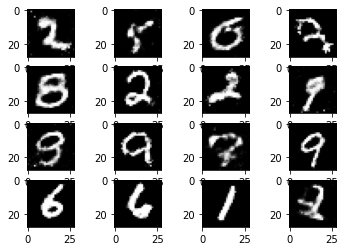

[74/200, 100/938] D_loss: 0.636 G_loss: 0.747
[74/200, 200/938] D_loss: 0.628 G_loss: 0.882
[74/200, 300/938] D_loss: 0.605 G_loss: 0.842
[74/200, 400/938] D_loss: 0.598 G_loss: 0.990
[74/200, 500/938] D_loss: 0.704 G_loss: 0.888
[74/200, 600/938] D_loss: 0.651 G_loss: 0.972
[74/200, 700/938] D_loss: 0.612 G_loss: 0.880
[74/200, 800/938] D_loss: 0.667 G_loss: 0.868
[74/200, 900/938] D_loss: 0.628 G_loss: 1.052
[74/200, 938/938] D_loss: 0.604 G_loss: 0.985


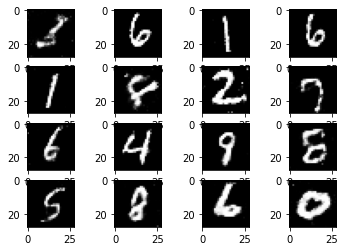

[75/200, 100/938] D_loss: 0.613 G_loss: 0.966
[75/200, 200/938] D_loss: 0.612 G_loss: 0.808
[75/200, 300/938] D_loss: 0.689 G_loss: 1.125
[75/200, 400/938] D_loss: 0.568 G_loss: 0.668
[75/200, 500/938] D_loss: 0.566 G_loss: 1.113
[75/200, 600/938] D_loss: 0.645 G_loss: 0.988
[75/200, 700/938] D_loss: 0.609 G_loss: 0.735
[75/200, 800/938] D_loss: 0.620 G_loss: 0.735
[75/200, 900/938] D_loss: 0.605 G_loss: 0.761
[75/200, 938/938] D_loss: 0.594 G_loss: 0.836


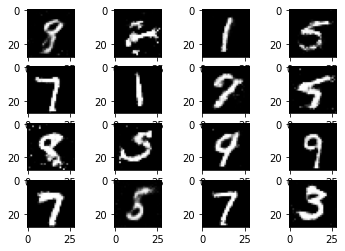

[76/200, 100/938] D_loss: 0.638 G_loss: 0.780
[76/200, 200/938] D_loss: 0.613 G_loss: 0.870
[76/200, 300/938] D_loss: 0.644 G_loss: 0.943
[76/200, 400/938] D_loss: 0.630 G_loss: 0.785
[76/200, 500/938] D_loss: 0.626 G_loss: 0.824
[76/200, 600/938] D_loss: 0.622 G_loss: 0.865
[76/200, 700/938] D_loss: 0.640 G_loss: 0.930
[76/200, 800/938] D_loss: 0.707 G_loss: 0.913
[76/200, 900/938] D_loss: 0.631 G_loss: 0.828
[76/200, 938/938] D_loss: 0.577 G_loss: 0.823


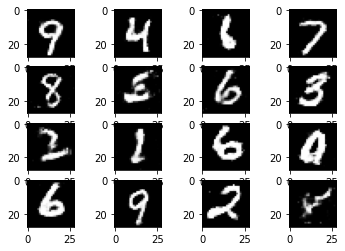

[77/200, 100/938] D_loss: 0.591 G_loss: 1.023
[77/200, 200/938] D_loss: 0.633 G_loss: 0.914
[77/200, 300/938] D_loss: 0.620 G_loss: 0.950
[77/200, 400/938] D_loss: 0.619 G_loss: 0.853
[77/200, 500/938] D_loss: 0.631 G_loss: 0.766
[77/200, 600/938] D_loss: 0.590 G_loss: 0.819
[77/200, 700/938] D_loss: 0.653 G_loss: 0.850
[77/200, 800/938] D_loss: 0.659 G_loss: 1.106
[77/200, 900/938] D_loss: 0.634 G_loss: 0.926
[77/200, 938/938] D_loss: 0.597 G_loss: 0.963


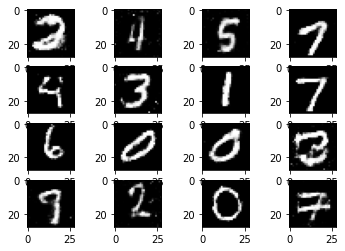

[78/200, 100/938] D_loss: 0.621 G_loss: 0.927
[78/200, 200/938] D_loss: 0.621 G_loss: 0.845
[78/200, 300/938] D_loss: 0.637 G_loss: 0.923
[78/200, 400/938] D_loss: 0.645 G_loss: 0.934
[78/200, 500/938] D_loss: 0.577 G_loss: 0.656
[78/200, 600/938] D_loss: 0.693 G_loss: 1.096
[78/200, 700/938] D_loss: 0.634 G_loss: 0.671
[78/200, 800/938] D_loss: 0.631 G_loss: 0.580
[78/200, 900/938] D_loss: 0.618 G_loss: 0.928
[78/200, 938/938] D_loss: 0.646 G_loss: 1.012


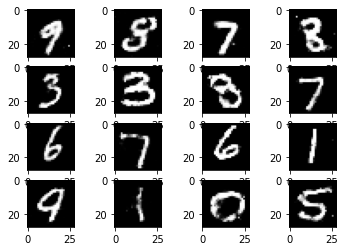

[79/200, 100/938] D_loss: 0.667 G_loss: 1.001
[79/200, 200/938] D_loss: 0.647 G_loss: 0.761
[79/200, 300/938] D_loss: 0.639 G_loss: 0.914
[79/200, 400/938] D_loss: 0.658 G_loss: 0.858
[79/200, 500/938] D_loss: 0.590 G_loss: 1.016
[79/200, 600/938] D_loss: 0.636 G_loss: 0.950
[79/200, 700/938] D_loss: 0.594 G_loss: 0.891
[79/200, 800/938] D_loss: 0.612 G_loss: 0.859
[79/200, 900/938] D_loss: 0.601 G_loss: 0.962
[79/200, 938/938] D_loss: 0.596 G_loss: 1.030


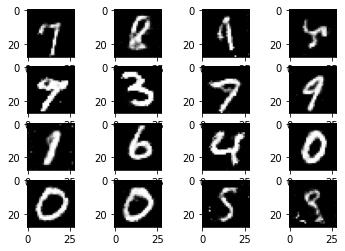

[80/200, 100/938] D_loss: 0.623 G_loss: 0.967
[80/200, 200/938] D_loss: 0.680 G_loss: 1.083
[80/200, 300/938] D_loss: 0.651 G_loss: 0.807
[80/200, 400/938] D_loss: 0.612 G_loss: 1.269
[80/200, 500/938] D_loss: 0.673 G_loss: 0.936
[80/200, 600/938] D_loss: 0.606 G_loss: 0.994
[80/200, 700/938] D_loss: 0.616 G_loss: 0.792
[80/200, 800/938] D_loss: 0.680 G_loss: 0.934
[80/200, 900/938] D_loss: 0.648 G_loss: 0.807
[80/200, 938/938] D_loss: 0.631 G_loss: 1.083


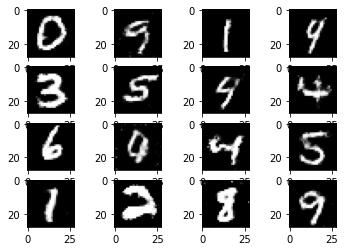

[81/200, 100/938] D_loss: 0.638 G_loss: 0.956
[81/200, 200/938] D_loss: 0.603 G_loss: 0.946
[81/200, 300/938] D_loss: 0.638 G_loss: 0.690
[81/200, 400/938] D_loss: 0.658 G_loss: 0.909
[81/200, 500/938] D_loss: 0.642 G_loss: 0.723
[81/200, 600/938] D_loss: 0.594 G_loss: 1.067
[81/200, 700/938] D_loss: 0.614 G_loss: 1.070
[81/200, 800/938] D_loss: 0.616 G_loss: 0.928
[81/200, 900/938] D_loss: 0.645 G_loss: 0.931
[81/200, 938/938] D_loss: 0.644 G_loss: 0.821


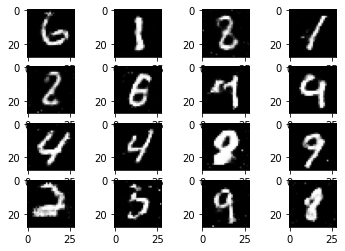

[82/200, 100/938] D_loss: 0.567 G_loss: 0.840
[82/200, 200/938] D_loss: 0.641 G_loss: 0.936
[82/200, 300/938] D_loss: 0.639 G_loss: 1.017
[82/200, 400/938] D_loss: 0.606 G_loss: 0.850
[82/200, 500/938] D_loss: 0.668 G_loss: 0.991
[82/200, 600/938] D_loss: 0.613 G_loss: 0.825
[82/200, 700/938] D_loss: 0.724 G_loss: 1.027
[82/200, 800/938] D_loss: 0.614 G_loss: 0.900
[82/200, 900/938] D_loss: 0.634 G_loss: 0.811
[82/200, 938/938] D_loss: 0.586 G_loss: 0.619


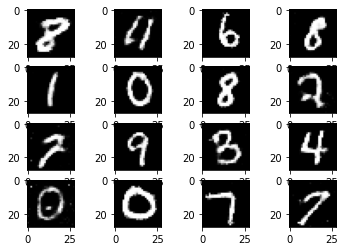

[83/200, 100/938] D_loss: 0.624 G_loss: 0.850
[83/200, 200/938] D_loss: 0.621 G_loss: 0.798
[83/200, 300/938] D_loss: 0.580 G_loss: 0.988
[83/200, 400/938] D_loss: 0.600 G_loss: 0.951
[83/200, 500/938] D_loss: 0.622 G_loss: 0.707
[83/200, 600/938] D_loss: 0.580 G_loss: 0.760
[83/200, 700/938] D_loss: 0.653 G_loss: 0.924
[83/200, 800/938] D_loss: 0.658 G_loss: 0.933
[83/200, 900/938] D_loss: 0.705 G_loss: 0.872
[83/200, 938/938] D_loss: 0.672 G_loss: 0.665


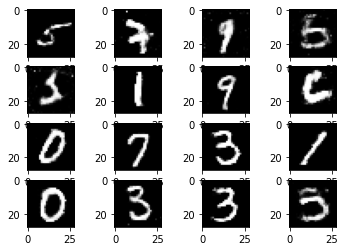

[84/200, 100/938] D_loss: 0.682 G_loss: 1.052
[84/200, 200/938] D_loss: 0.618 G_loss: 0.822
[84/200, 300/938] D_loss: 0.590 G_loss: 0.991
[84/200, 400/938] D_loss: 0.607 G_loss: 1.056
[84/200, 500/938] D_loss: 0.590 G_loss: 0.891
[84/200, 600/938] D_loss: 0.585 G_loss: 0.943
[84/200, 700/938] D_loss: 0.605 G_loss: 0.874
[84/200, 800/938] D_loss: 0.585 G_loss: 1.010
[84/200, 900/938] D_loss: 0.606 G_loss: 0.745
[84/200, 938/938] D_loss: 0.652 G_loss: 0.925


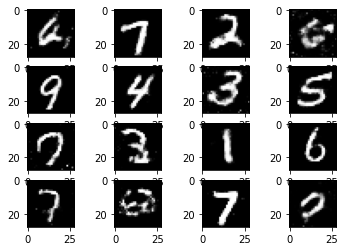

[85/200, 100/938] D_loss: 0.606 G_loss: 0.906
[85/200, 200/938] D_loss: 0.591 G_loss: 0.921
[85/200, 300/938] D_loss: 0.661 G_loss: 0.685
[85/200, 400/938] D_loss: 0.636 G_loss: 0.847
[85/200, 500/938] D_loss: 0.660 G_loss: 0.869
[85/200, 600/938] D_loss: 0.603 G_loss: 1.013
[85/200, 700/938] D_loss: 0.612 G_loss: 0.589
[85/200, 800/938] D_loss: 0.634 G_loss: 1.012
[85/200, 900/938] D_loss: 0.588 G_loss: 0.853
[85/200, 938/938] D_loss: 0.661 G_loss: 1.088


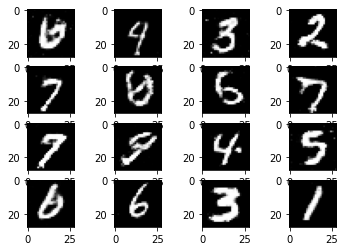

[86/200, 100/938] D_loss: 0.594 G_loss: 0.867
[86/200, 200/938] D_loss: 0.603 G_loss: 0.891
[86/200, 300/938] D_loss: 0.633 G_loss: 1.106
[86/200, 400/938] D_loss: 0.621 G_loss: 0.596
[86/200, 500/938] D_loss: 0.626 G_loss: 0.974
[86/200, 600/938] D_loss: 0.617 G_loss: 0.879
[86/200, 700/938] D_loss: 0.618 G_loss: 0.835
[86/200, 800/938] D_loss: 0.597 G_loss: 0.902
[86/200, 900/938] D_loss: 0.593 G_loss: 1.057
[86/200, 938/938] D_loss: 0.692 G_loss: 0.975


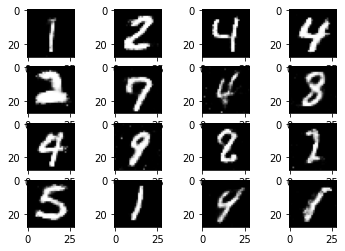

[87/200, 100/938] D_loss: 0.629 G_loss: 0.909
[87/200, 200/938] D_loss: 0.612 G_loss: 1.070
[87/200, 300/938] D_loss: 0.605 G_loss: 0.730
[87/200, 400/938] D_loss: 0.597 G_loss: 0.968
[87/200, 500/938] D_loss: 0.665 G_loss: 0.811
[87/200, 600/938] D_loss: 0.666 G_loss: 0.913
[87/200, 700/938] D_loss: 0.607 G_loss: 0.905
[87/200, 800/938] D_loss: 0.636 G_loss: 0.990
[87/200, 900/938] D_loss: 0.600 G_loss: 0.983
[87/200, 938/938] D_loss: 0.677 G_loss: 0.852


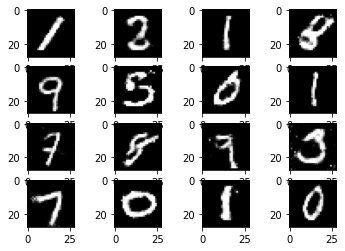

[88/200, 100/938] D_loss: 0.652 G_loss: 0.949
[88/200, 200/938] D_loss: 0.611 G_loss: 0.657
[88/200, 300/938] D_loss: 0.659 G_loss: 0.825
[88/200, 400/938] D_loss: 0.659 G_loss: 0.743
[88/200, 500/938] D_loss: 0.625 G_loss: 0.758
[88/200, 600/938] D_loss: 0.640 G_loss: 0.898
[88/200, 700/938] D_loss: 0.655 G_loss: 0.915
[88/200, 800/938] D_loss: 0.624 G_loss: 0.959
[88/200, 900/938] D_loss: 0.641 G_loss: 0.841
[88/200, 938/938] D_loss: 0.676 G_loss: 1.038


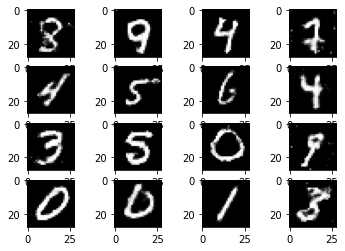

[89/200, 100/938] D_loss: 0.636 G_loss: 1.196
[89/200, 200/938] D_loss: 0.628 G_loss: 0.773
[89/200, 300/938] D_loss: 0.558 G_loss: 0.923
[89/200, 400/938] D_loss: 0.628 G_loss: 0.983
[89/200, 500/938] D_loss: 0.609 G_loss: 0.904
[89/200, 600/938] D_loss: 0.671 G_loss: 0.949
[89/200, 700/938] D_loss: 0.614 G_loss: 0.814
[89/200, 800/938] D_loss: 0.638 G_loss: 1.113
[89/200, 900/938] D_loss: 0.687 G_loss: 0.854
[89/200, 938/938] D_loss: 0.611 G_loss: 0.986


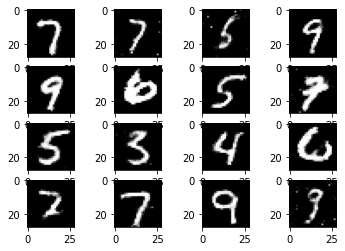

[90/200, 100/938] D_loss: 0.571 G_loss: 1.252
[90/200, 200/938] D_loss: 0.642 G_loss: 0.810
[90/200, 300/938] D_loss: 0.614 G_loss: 0.822
[90/200, 400/938] D_loss: 0.646 G_loss: 0.927
[90/200, 500/938] D_loss: 0.672 G_loss: 0.898
[90/200, 600/938] D_loss: 0.625 G_loss: 0.876
[90/200, 700/938] D_loss: 0.632 G_loss: 0.903
[90/200, 800/938] D_loss: 0.645 G_loss: 0.773
[90/200, 900/938] D_loss: 0.583 G_loss: 1.097
[90/200, 938/938] D_loss: 0.612 G_loss: 0.793


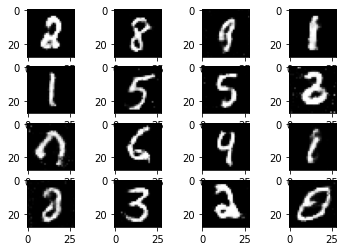

[91/200, 100/938] D_loss: 0.606 G_loss: 1.104
[91/200, 200/938] D_loss: 0.666 G_loss: 0.900
[91/200, 300/938] D_loss: 0.681 G_loss: 0.850
[91/200, 400/938] D_loss: 0.646 G_loss: 1.051
[91/200, 500/938] D_loss: 0.663 G_loss: 0.785
[91/200, 600/938] D_loss: 0.604 G_loss: 0.934
[91/200, 700/938] D_loss: 0.643 G_loss: 0.766
[91/200, 800/938] D_loss: 0.636 G_loss: 0.959
[91/200, 900/938] D_loss: 0.635 G_loss: 0.906
[91/200, 938/938] D_loss: 0.616 G_loss: 1.003


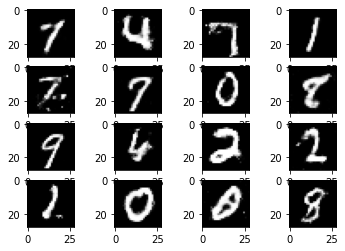

[92/200, 100/938] D_loss: 0.596 G_loss: 0.838
[92/200, 200/938] D_loss: 0.660 G_loss: 1.120
[92/200, 300/938] D_loss: 0.636 G_loss: 0.745
[92/200, 400/938] D_loss: 0.593 G_loss: 1.126
[92/200, 500/938] D_loss: 0.630 G_loss: 0.861
[92/200, 600/938] D_loss: 0.644 G_loss: 0.833
[92/200, 700/938] D_loss: 0.592 G_loss: 1.053
[92/200, 800/938] D_loss: 0.667 G_loss: 0.993
[92/200, 900/938] D_loss: 0.628 G_loss: 0.784
[92/200, 938/938] D_loss: 0.704 G_loss: 0.720


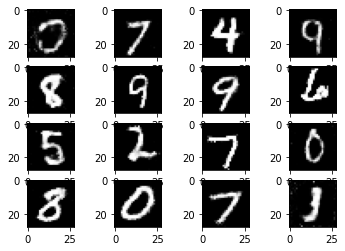

[93/200, 100/938] D_loss: 0.641 G_loss: 0.795
[93/200, 200/938] D_loss: 0.671 G_loss: 0.896
[93/200, 300/938] D_loss: 0.731 G_loss: 0.756
[93/200, 400/938] D_loss: 0.660 G_loss: 0.955
[93/200, 500/938] D_loss: 0.647 G_loss: 0.982
[93/200, 600/938] D_loss: 0.679 G_loss: 0.700
[93/200, 700/938] D_loss: 0.650 G_loss: 0.901
[93/200, 800/938] D_loss: 0.642 G_loss: 1.135
[93/200, 900/938] D_loss: 0.626 G_loss: 1.140
[93/200, 938/938] D_loss: 0.548 G_loss: 0.891


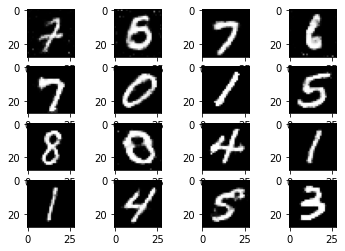

[94/200, 100/938] D_loss: 0.644 G_loss: 0.783
[94/200, 200/938] D_loss: 0.604 G_loss: 1.040
[94/200, 300/938] D_loss: 0.605 G_loss: 0.905
[94/200, 400/938] D_loss: 0.647 G_loss: 1.046
[94/200, 500/938] D_loss: 0.629 G_loss: 0.752
[94/200, 600/938] D_loss: 0.654 G_loss: 0.821
[94/200, 700/938] D_loss: 0.584 G_loss: 0.940
[94/200, 800/938] D_loss: 0.635 G_loss: 0.779
[94/200, 900/938] D_loss: 0.615 G_loss: 0.940
[94/200, 938/938] D_loss: 0.656 G_loss: 0.793


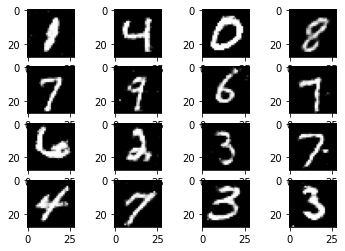

[95/200, 100/938] D_loss: 0.635 G_loss: 0.902
[95/200, 200/938] D_loss: 0.692 G_loss: 0.921
[95/200, 300/938] D_loss: 0.606 G_loss: 0.732
[95/200, 400/938] D_loss: 0.603 G_loss: 1.149
[95/200, 500/938] D_loss: 0.612 G_loss: 0.802
[95/200, 600/938] D_loss: 0.632 G_loss: 0.959
[95/200, 700/938] D_loss: 0.664 G_loss: 0.809
[95/200, 800/938] D_loss: 0.583 G_loss: 0.823
[95/200, 900/938] D_loss: 0.632 G_loss: 1.065
[95/200, 938/938] D_loss: 0.666 G_loss: 1.006


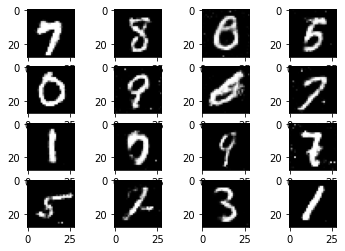

[96/200, 100/938] D_loss: 0.617 G_loss: 1.140
[96/200, 200/938] D_loss: 0.600 G_loss: 1.122
[96/200, 300/938] D_loss: 0.615 G_loss: 0.809
[96/200, 400/938] D_loss: 0.589 G_loss: 0.836
[96/200, 500/938] D_loss: 0.618 G_loss: 0.995
[96/200, 600/938] D_loss: 0.592 G_loss: 1.013
[96/200, 700/938] D_loss: 0.646 G_loss: 0.817
[96/200, 800/938] D_loss: 0.628 G_loss: 0.782
[96/200, 900/938] D_loss: 0.651 G_loss: 0.855
[96/200, 938/938] D_loss: 0.595 G_loss: 0.807


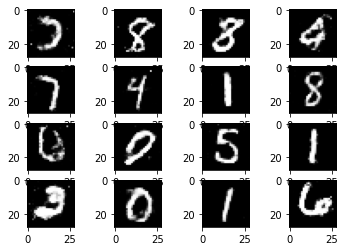

[97/200, 100/938] D_loss: 0.624 G_loss: 0.877
[97/200, 200/938] D_loss: 0.664 G_loss: 1.068
[97/200, 300/938] D_loss: 0.656 G_loss: 0.903
[97/200, 400/938] D_loss: 0.630 G_loss: 0.749
[97/200, 500/938] D_loss: 0.661 G_loss: 0.977
[97/200, 600/938] D_loss: 0.608 G_loss: 1.065
[97/200, 700/938] D_loss: 0.604 G_loss: 1.030
[97/200, 800/938] D_loss: 0.652 G_loss: 0.782
[97/200, 900/938] D_loss: 0.639 G_loss: 0.836
[97/200, 938/938] D_loss: 0.608 G_loss: 0.821


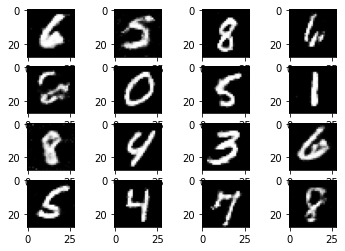

[98/200, 100/938] D_loss: 0.626 G_loss: 0.785
[98/200, 200/938] D_loss: 0.611 G_loss: 0.716
[98/200, 300/938] D_loss: 0.539 G_loss: 1.136
[98/200, 400/938] D_loss: 0.657 G_loss: 0.845
[98/200, 500/938] D_loss: 0.581 G_loss: 0.814
[98/200, 600/938] D_loss: 0.626 G_loss: 0.953
[98/200, 700/938] D_loss: 0.637 G_loss: 0.879
[98/200, 800/938] D_loss: 0.601 G_loss: 0.811
[98/200, 900/938] D_loss: 0.660 G_loss: 0.918
[98/200, 938/938] D_loss: 0.613 G_loss: 0.855


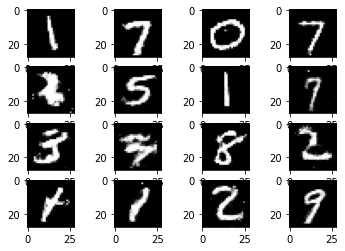

[99/200, 100/938] D_loss: 0.580 G_loss: 0.873
[99/200, 200/938] D_loss: 0.624 G_loss: 0.923
[99/200, 300/938] D_loss: 0.610 G_loss: 0.806
[99/200, 400/938] D_loss: 0.583 G_loss: 0.808
[99/200, 500/938] D_loss: 0.597 G_loss: 0.799
[99/200, 600/938] D_loss: 0.641 G_loss: 0.801
[99/200, 700/938] D_loss: 0.634 G_loss: 1.026
[99/200, 800/938] D_loss: 0.629 G_loss: 0.742
[99/200, 900/938] D_loss: 0.624 G_loss: 1.038
[99/200, 938/938] D_loss: 0.616 G_loss: 1.130


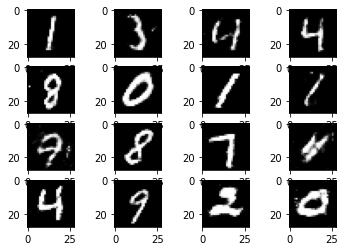

[100/200, 100/938] D_loss: 0.609 G_loss: 1.094
[100/200, 200/938] D_loss: 0.629 G_loss: 0.999
[100/200, 300/938] D_loss: 0.659 G_loss: 0.751
[100/200, 400/938] D_loss: 0.661 G_loss: 0.978
[100/200, 500/938] D_loss: 0.660 G_loss: 0.666
[100/200, 600/938] D_loss: 0.637 G_loss: 1.133
[100/200, 700/938] D_loss: 0.604 G_loss: 1.071
[100/200, 800/938] D_loss: 0.635 G_loss: 0.975
[100/200, 900/938] D_loss: 0.643 G_loss: 0.857
[100/200, 938/938] D_loss: 0.603 G_loss: 1.275


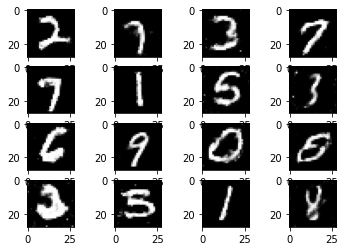

Model saved.
[101/200, 100/938] D_loss: 0.596 G_loss: 1.050
[101/200, 200/938] D_loss: 0.610 G_loss: 1.321
[101/200, 300/938] D_loss: 0.619 G_loss: 0.996
[101/200, 400/938] D_loss: 0.688 G_loss: 0.847
[101/200, 500/938] D_loss: 0.622 G_loss: 0.965
[101/200, 600/938] D_loss: 0.652 G_loss: 0.841
[101/200, 700/938] D_loss: 0.665 G_loss: 0.789
[101/200, 800/938] D_loss: 0.579 G_loss: 0.939
[101/200, 900/938] D_loss: 0.603 G_loss: 0.720
[101/200, 938/938] D_loss: 0.603 G_loss: 0.732


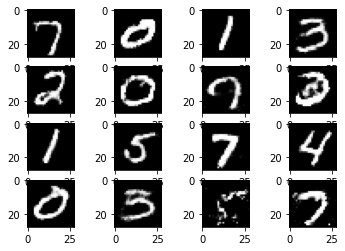

[102/200, 100/938] D_loss: 0.693 G_loss: 1.076
[102/200, 200/938] D_loss: 0.629 G_loss: 0.815
[102/200, 300/938] D_loss: 0.545 G_loss: 0.844
[102/200, 400/938] D_loss: 0.707 G_loss: 1.047
[102/200, 500/938] D_loss: 0.598 G_loss: 0.919
[102/200, 600/938] D_loss: 0.593 G_loss: 1.040
[102/200, 700/938] D_loss: 0.616 G_loss: 0.878
[102/200, 800/938] D_loss: 0.610 G_loss: 1.057
[102/200, 900/938] D_loss: 0.649 G_loss: 0.896
[102/200, 938/938] D_loss: 0.693 G_loss: 0.932


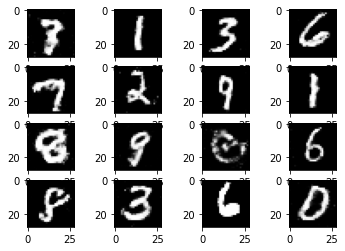

[103/200, 100/938] D_loss: 0.620 G_loss: 0.784
[103/200, 200/938] D_loss: 0.631 G_loss: 0.857
[103/200, 300/938] D_loss: 0.659 G_loss: 0.943
[103/200, 400/938] D_loss: 0.658 G_loss: 0.943
[103/200, 500/938] D_loss: 0.663 G_loss: 0.711
[103/200, 600/938] D_loss: 0.588 G_loss: 1.036
[103/200, 700/938] D_loss: 0.611 G_loss: 0.760
[103/200, 800/938] D_loss: 0.647 G_loss: 0.889
[103/200, 900/938] D_loss: 0.637 G_loss: 1.088
[103/200, 938/938] D_loss: 0.612 G_loss: 0.573


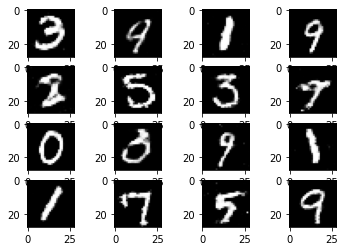

[104/200, 100/938] D_loss: 0.628 G_loss: 0.766
[104/200, 200/938] D_loss: 0.628 G_loss: 0.815
[104/200, 300/938] D_loss: 0.632 G_loss: 0.871
[104/200, 400/938] D_loss: 0.613 G_loss: 0.896
[104/200, 500/938] D_loss: 0.621 G_loss: 0.894
[104/200, 600/938] D_loss: 0.628 G_loss: 0.967
[104/200, 700/938] D_loss: 0.627 G_loss: 0.796
[104/200, 800/938] D_loss: 0.606 G_loss: 0.877
[104/200, 900/938] D_loss: 0.643 G_loss: 0.750
[104/200, 938/938] D_loss: 0.630 G_loss: 0.943


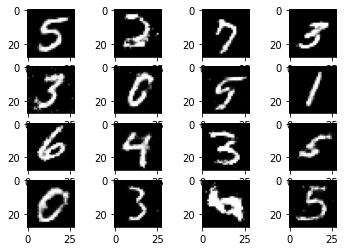

[105/200, 100/938] D_loss: 0.602 G_loss: 0.897
[105/200, 200/938] D_loss: 0.638 G_loss: 0.974
[105/200, 300/938] D_loss: 0.608 G_loss: 0.804
[105/200, 400/938] D_loss: 0.614 G_loss: 0.743
[105/200, 500/938] D_loss: 0.664 G_loss: 0.736
[105/200, 600/938] D_loss: 0.637 G_loss: 0.877
[105/200, 700/938] D_loss: 0.609 G_loss: 0.900
[105/200, 800/938] D_loss: 0.702 G_loss: 0.941
[105/200, 900/938] D_loss: 0.645 G_loss: 1.203
[105/200, 938/938] D_loss: 0.625 G_loss: 0.753


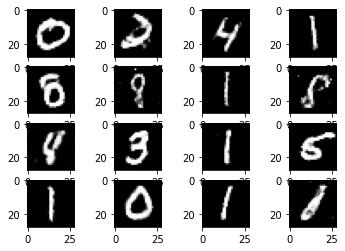

[106/200, 100/938] D_loss: 0.624 G_loss: 0.906
[106/200, 200/938] D_loss: 0.615 G_loss: 0.791
[106/200, 300/938] D_loss: 0.619 G_loss: 0.926
[106/200, 400/938] D_loss: 0.638 G_loss: 0.864
[106/200, 500/938] D_loss: 0.637 G_loss: 0.951
[106/200, 600/938] D_loss: 0.596 G_loss: 0.794
[106/200, 700/938] D_loss: 0.575 G_loss: 0.824
[106/200, 800/938] D_loss: 0.530 G_loss: 0.804
[106/200, 900/938] D_loss: 0.649 G_loss: 0.749
[106/200, 938/938] D_loss: 0.667 G_loss: 0.929


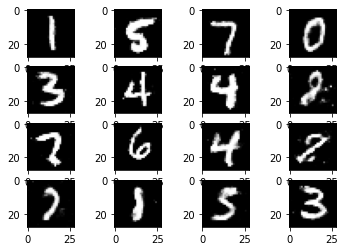

[107/200, 100/938] D_loss: 0.602 G_loss: 0.855
[107/200, 200/938] D_loss: 0.641 G_loss: 0.857
[107/200, 300/938] D_loss: 0.581 G_loss: 0.863
[107/200, 400/938] D_loss: 0.645 G_loss: 0.913
[107/200, 500/938] D_loss: 0.576 G_loss: 0.852
[107/200, 600/938] D_loss: 0.610 G_loss: 0.859
[107/200, 700/938] D_loss: 0.654 G_loss: 0.985
[107/200, 800/938] D_loss: 0.677 G_loss: 0.801
[107/200, 900/938] D_loss: 0.647 G_loss: 1.105
[107/200, 938/938] D_loss: 0.621 G_loss: 0.922


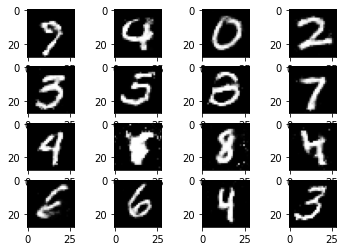

[108/200, 100/938] D_loss: 0.626 G_loss: 0.890
[108/200, 200/938] D_loss: 0.656 G_loss: 0.749
[108/200, 300/938] D_loss: 0.659 G_loss: 0.865
[108/200, 400/938] D_loss: 0.607 G_loss: 1.073
[108/200, 500/938] D_loss: 0.697 G_loss: 0.642
[108/200, 600/938] D_loss: 0.618 G_loss: 0.967
[108/200, 700/938] D_loss: 0.613 G_loss: 1.104
[108/200, 800/938] D_loss: 0.610 G_loss: 1.014
[108/200, 900/938] D_loss: 0.644 G_loss: 0.929
[108/200, 938/938] D_loss: 0.562 G_loss: 1.074


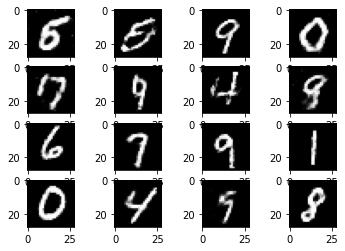

[109/200, 100/938] D_loss: 0.615 G_loss: 1.050
[109/200, 200/938] D_loss: 0.619 G_loss: 0.818
[109/200, 300/938] D_loss: 0.567 G_loss: 0.780
[109/200, 400/938] D_loss: 0.640 G_loss: 0.787
[109/200, 500/938] D_loss: 0.611 G_loss: 0.810
[109/200, 600/938] D_loss: 0.621 G_loss: 0.784
[109/200, 700/938] D_loss: 0.632 G_loss: 1.013
[109/200, 800/938] D_loss: 0.649 G_loss: 1.107
[109/200, 900/938] D_loss: 0.590 G_loss: 0.834
[109/200, 938/938] D_loss: 0.675 G_loss: 0.804


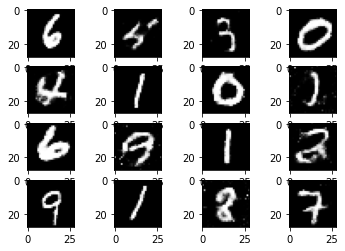

[110/200, 100/938] D_loss: 0.636 G_loss: 0.872
[110/200, 200/938] D_loss: 0.648 G_loss: 1.303
[110/200, 300/938] D_loss: 0.612 G_loss: 0.832
[110/200, 400/938] D_loss: 0.588 G_loss: 0.811
[110/200, 500/938] D_loss: 0.616 G_loss: 0.863
[110/200, 600/938] D_loss: 0.642 G_loss: 0.962
[110/200, 700/938] D_loss: 0.636 G_loss: 1.121
[110/200, 800/938] D_loss: 0.630 G_loss: 0.974
[110/200, 900/938] D_loss: 0.654 G_loss: 0.948
[110/200, 938/938] D_loss: 0.602 G_loss: 0.995


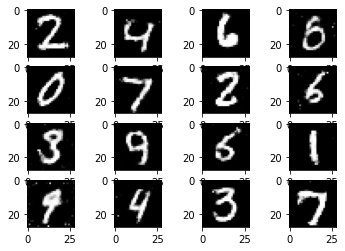

[111/200, 100/938] D_loss: 0.613 G_loss: 0.837
[111/200, 200/938] D_loss: 0.598 G_loss: 0.764
[111/200, 300/938] D_loss: 0.652 G_loss: 0.624
[111/200, 400/938] D_loss: 0.589 G_loss: 0.711
[111/200, 500/938] D_loss: 0.601 G_loss: 1.103
[111/200, 600/938] D_loss: 0.647 G_loss: 0.884
[111/200, 700/938] D_loss: 0.627 G_loss: 0.871
[111/200, 800/938] D_loss: 0.601 G_loss: 0.790
[111/200, 900/938] D_loss: 0.624 G_loss: 0.944
[111/200, 938/938] D_loss: 0.579 G_loss: 1.098


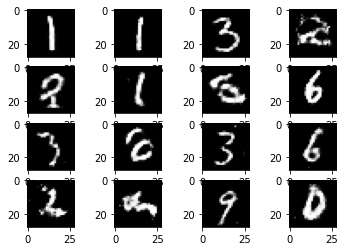

[112/200, 100/938] D_loss: 0.692 G_loss: 1.149
[112/200, 200/938] D_loss: 0.639 G_loss: 0.672
[112/200, 300/938] D_loss: 0.605 G_loss: 0.910
[112/200, 400/938] D_loss: 0.619 G_loss: 0.869
[112/200, 500/938] D_loss: 0.595 G_loss: 0.813
[112/200, 600/938] D_loss: 0.655 G_loss: 0.823
[112/200, 700/938] D_loss: 0.629 G_loss: 0.853
[112/200, 800/938] D_loss: 0.620 G_loss: 1.114
[112/200, 900/938] D_loss: 0.620 G_loss: 1.109
[112/200, 938/938] D_loss: 0.636 G_loss: 0.772


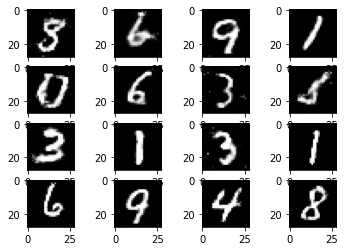

[113/200, 100/938] D_loss: 0.662 G_loss: 0.960
[113/200, 200/938] D_loss: 0.648 G_loss: 0.972
[113/200, 300/938] D_loss: 0.591 G_loss: 0.812
[113/200, 400/938] D_loss: 0.656 G_loss: 0.785
[113/200, 500/938] D_loss: 0.646 G_loss: 0.728
[113/200, 600/938] D_loss: 0.592 G_loss: 1.022
[113/200, 700/938] D_loss: 0.647 G_loss: 0.951
[113/200, 800/938] D_loss: 0.647 G_loss: 0.839
[113/200, 900/938] D_loss: 0.627 G_loss: 0.993
[113/200, 938/938] D_loss: 0.586 G_loss: 0.843


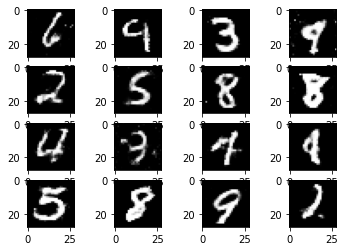

[114/200, 100/938] D_loss: 0.573 G_loss: 0.874
[114/200, 200/938] D_loss: 0.614 G_loss: 0.910
[114/200, 300/938] D_loss: 0.619 G_loss: 0.909
[114/200, 400/938] D_loss: 0.621 G_loss: 0.842
[114/200, 500/938] D_loss: 0.641 G_loss: 0.776
[114/200, 600/938] D_loss: 0.648 G_loss: 1.021
[114/200, 700/938] D_loss: 0.660 G_loss: 0.901
[114/200, 800/938] D_loss: 0.589 G_loss: 0.860
[114/200, 900/938] D_loss: 0.658 G_loss: 0.916
[114/200, 938/938] D_loss: 0.691 G_loss: 1.012


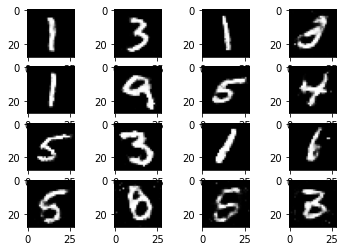

[115/200, 100/938] D_loss: 0.601 G_loss: 0.975
[115/200, 200/938] D_loss: 0.592 G_loss: 0.960
[115/200, 300/938] D_loss: 0.625 G_loss: 0.919
[115/200, 400/938] D_loss: 0.594 G_loss: 0.809
[115/200, 500/938] D_loss: 0.583 G_loss: 0.786
[115/200, 600/938] D_loss: 0.686 G_loss: 0.780
[115/200, 700/938] D_loss: 0.624 G_loss: 0.814
[115/200, 800/938] D_loss: 0.608 G_loss: 0.920
[115/200, 900/938] D_loss: 0.705 G_loss: 1.021
[115/200, 938/938] D_loss: 0.669 G_loss: 0.846


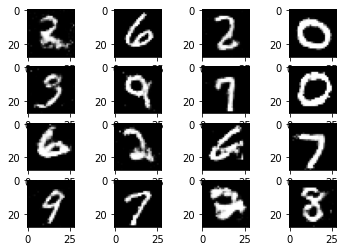

[116/200, 100/938] D_loss: 0.630 G_loss: 0.939
[116/200, 200/938] D_loss: 0.610 G_loss: 0.908
[116/200, 300/938] D_loss: 0.603 G_loss: 0.784
[116/200, 400/938] D_loss: 0.649 G_loss: 0.756
[116/200, 500/938] D_loss: 0.633 G_loss: 1.109
[116/200, 600/938] D_loss: 0.652 G_loss: 0.816
[116/200, 700/938] D_loss: 0.578 G_loss: 0.958
[116/200, 800/938] D_loss: 0.681 G_loss: 0.879
[116/200, 900/938] D_loss: 0.609 G_loss: 0.903
[116/200, 938/938] D_loss: 0.589 G_loss: 1.043


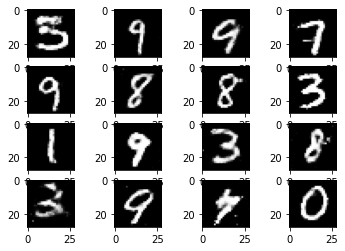

[117/200, 100/938] D_loss: 0.682 G_loss: 0.977
[117/200, 200/938] D_loss: 0.595 G_loss: 0.944
[117/200, 300/938] D_loss: 0.648 G_loss: 0.899
[117/200, 400/938] D_loss: 0.613 G_loss: 1.025
[117/200, 500/938] D_loss: 0.640 G_loss: 0.891
[117/200, 600/938] D_loss: 0.661 G_loss: 0.913
[117/200, 700/938] D_loss: 0.656 G_loss: 1.128
[117/200, 800/938] D_loss: 0.631 G_loss: 0.887
[117/200, 900/938] D_loss: 0.617 G_loss: 0.993
[117/200, 938/938] D_loss: 0.672 G_loss: 0.733


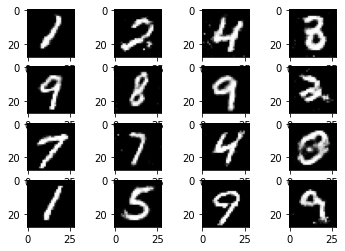

[118/200, 100/938] D_loss: 0.675 G_loss: 0.982
[118/200, 200/938] D_loss: 0.652 G_loss: 0.929
[118/200, 300/938] D_loss: 0.624 G_loss: 1.155
[118/200, 400/938] D_loss: 0.559 G_loss: 0.823
[118/200, 500/938] D_loss: 0.580 G_loss: 0.990
[118/200, 600/938] D_loss: 0.658 G_loss: 0.760
[118/200, 700/938] D_loss: 0.641 G_loss: 0.863
[118/200, 800/938] D_loss: 0.667 G_loss: 0.938
[118/200, 900/938] D_loss: 0.666 G_loss: 1.003
[118/200, 938/938] D_loss: 0.623 G_loss: 1.088


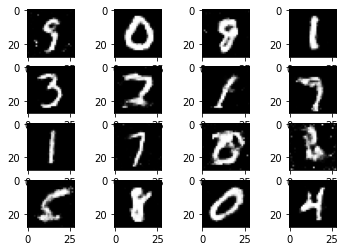

[119/200, 100/938] D_loss: 0.588 G_loss: 0.957
[119/200, 200/938] D_loss: 0.628 G_loss: 0.842
[119/200, 300/938] D_loss: 0.642 G_loss: 1.177
[119/200, 400/938] D_loss: 0.590 G_loss: 0.660
[119/200, 500/938] D_loss: 0.611 G_loss: 1.098
[119/200, 600/938] D_loss: 0.652 G_loss: 0.776
[119/200, 700/938] D_loss: 0.629 G_loss: 0.886
[119/200, 800/938] D_loss: 0.616 G_loss: 0.870
[119/200, 900/938] D_loss: 0.649 G_loss: 0.970
[119/200, 938/938] D_loss: 0.616 G_loss: 0.781


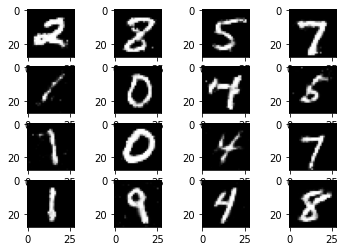

[120/200, 100/938] D_loss: 0.646 G_loss: 1.018
[120/200, 200/938] D_loss: 0.594 G_loss: 0.953
[120/200, 300/938] D_loss: 0.595 G_loss: 0.899
[120/200, 400/938] D_loss: 0.591 G_loss: 0.854
[120/200, 500/938] D_loss: 0.632 G_loss: 0.840
[120/200, 600/938] D_loss: 0.659 G_loss: 0.734
[120/200, 700/938] D_loss: 0.620 G_loss: 1.016
[120/200, 800/938] D_loss: 0.622 G_loss: 0.861
[120/200, 900/938] D_loss: 0.636 G_loss: 1.029
[120/200, 938/938] D_loss: 0.573 G_loss: 0.766


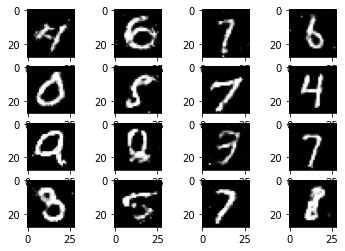

[121/200, 100/938] D_loss: 0.644 G_loss: 0.872
[121/200, 200/938] D_loss: 0.636 G_loss: 0.887
[121/200, 300/938] D_loss: 0.647 G_loss: 0.832
[121/200, 400/938] D_loss: 0.603 G_loss: 0.850
[121/200, 500/938] D_loss: 0.604 G_loss: 0.999
[121/200, 600/938] D_loss: 0.588 G_loss: 0.969
[121/200, 700/938] D_loss: 0.602 G_loss: 1.038
[121/200, 800/938] D_loss: 0.604 G_loss: 0.979
[121/200, 900/938] D_loss: 0.647 G_loss: 0.817
[121/200, 938/938] D_loss: 0.664 G_loss: 0.853


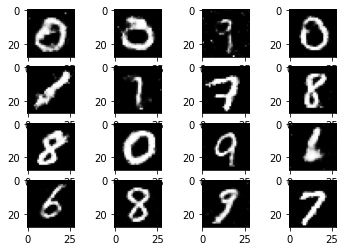

[122/200, 100/938] D_loss: 0.572 G_loss: 0.880
[122/200, 200/938] D_loss: 0.645 G_loss: 0.870
[122/200, 300/938] D_loss: 0.594 G_loss: 1.048
[122/200, 400/938] D_loss: 0.624 G_loss: 0.947
[122/200, 500/938] D_loss: 0.654 G_loss: 1.027
[122/200, 600/938] D_loss: 0.695 G_loss: 0.794
[122/200, 700/938] D_loss: 0.625 G_loss: 0.800
[122/200, 800/938] D_loss: 0.663 G_loss: 0.814
[122/200, 900/938] D_loss: 0.574 G_loss: 1.007
[122/200, 938/938] D_loss: 0.700 G_loss: 1.298


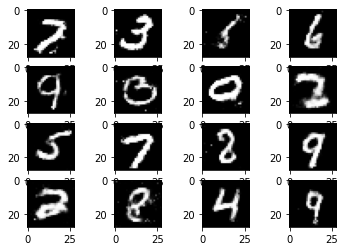

[123/200, 100/938] D_loss: 0.577 G_loss: 0.866
[123/200, 200/938] D_loss: 0.597 G_loss: 1.005
[123/200, 300/938] D_loss: 0.593 G_loss: 0.791
[123/200, 400/938] D_loss: 0.609 G_loss: 1.013
[123/200, 500/938] D_loss: 0.599 G_loss: 0.920
[123/200, 600/938] D_loss: 0.627 G_loss: 1.012
[123/200, 700/938] D_loss: 0.627 G_loss: 0.973
[123/200, 800/938] D_loss: 0.662 G_loss: 1.012
[123/200, 900/938] D_loss: 0.634 G_loss: 0.780
[123/200, 938/938] D_loss: 0.567 G_loss: 1.013


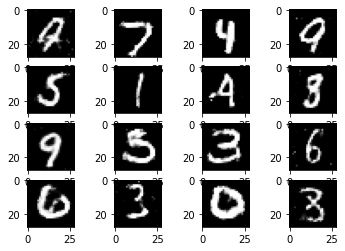

[124/200, 100/938] D_loss: 0.681 G_loss: 0.804
[124/200, 200/938] D_loss: 0.621 G_loss: 1.000
[124/200, 300/938] D_loss: 0.578 G_loss: 1.067
[124/200, 400/938] D_loss: 0.620 G_loss: 1.011
[124/200, 500/938] D_loss: 0.576 G_loss: 1.082
[124/200, 600/938] D_loss: 0.607 G_loss: 1.007
[124/200, 700/938] D_loss: 0.611 G_loss: 1.273
[124/200, 800/938] D_loss: 0.599 G_loss: 1.036
[124/200, 900/938] D_loss: 0.608 G_loss: 0.880
[124/200, 938/938] D_loss: 0.656 G_loss: 0.916


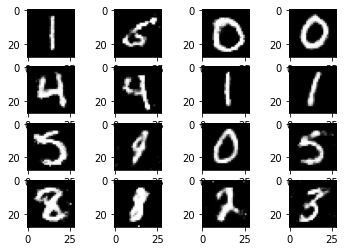

[125/200, 100/938] D_loss: 0.662 G_loss: 0.740
[125/200, 200/938] D_loss: 0.599 G_loss: 1.068
[125/200, 300/938] D_loss: 0.628 G_loss: 0.934
[125/200, 400/938] D_loss: 0.612 G_loss: 1.010
[125/200, 500/938] D_loss: 0.589 G_loss: 1.056
[125/200, 600/938] D_loss: 0.612 G_loss: 1.081
[125/200, 700/938] D_loss: 0.611 G_loss: 0.968
[125/200, 800/938] D_loss: 0.662 G_loss: 0.689
[125/200, 900/938] D_loss: 0.618 G_loss: 0.906
[125/200, 938/938] D_loss: 0.639 G_loss: 0.804


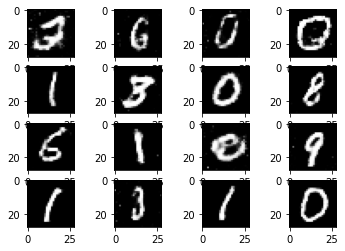

[126/200, 100/938] D_loss: 0.599 G_loss: 0.980
[126/200, 200/938] D_loss: 0.628 G_loss: 0.898
[126/200, 300/938] D_loss: 0.582 G_loss: 1.087
[126/200, 400/938] D_loss: 0.644 G_loss: 0.942
[126/200, 500/938] D_loss: 0.615 G_loss: 0.804
[126/200, 600/938] D_loss: 0.662 G_loss: 0.741
[126/200, 700/938] D_loss: 0.622 G_loss: 0.973
[126/200, 800/938] D_loss: 0.643 G_loss: 0.961
[126/200, 900/938] D_loss: 0.645 G_loss: 1.006
[126/200, 938/938] D_loss: 0.646 G_loss: 1.173


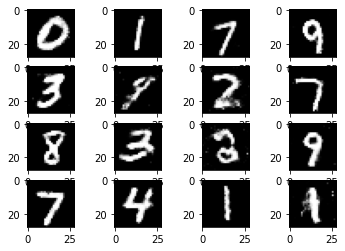

[127/200, 100/938] D_loss: 0.670 G_loss: 0.874
[127/200, 200/938] D_loss: 0.640 G_loss: 0.889
[127/200, 300/938] D_loss: 0.628 G_loss: 1.104
[127/200, 400/938] D_loss: 0.634 G_loss: 0.998
[127/200, 500/938] D_loss: 0.653 G_loss: 1.049
[127/200, 600/938] D_loss: 0.580 G_loss: 0.986
[127/200, 700/938] D_loss: 0.624 G_loss: 1.047
[127/200, 800/938] D_loss: 0.631 G_loss: 0.763
[127/200, 900/938] D_loss: 0.654 G_loss: 0.898
[127/200, 938/938] D_loss: 0.625 G_loss: 0.749


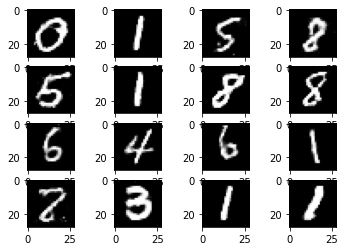

[128/200, 100/938] D_loss: 0.595 G_loss: 1.004
[128/200, 200/938] D_loss: 0.617 G_loss: 0.866
[128/200, 300/938] D_loss: 0.621 G_loss: 1.016
[128/200, 400/938] D_loss: 0.596 G_loss: 0.995
[128/200, 500/938] D_loss: 0.593 G_loss: 0.776
[128/200, 600/938] D_loss: 0.634 G_loss: 0.820
[128/200, 700/938] D_loss: 0.601 G_loss: 1.104
[128/200, 800/938] D_loss: 0.595 G_loss: 0.785
[128/200, 900/938] D_loss: 0.622 G_loss: 0.882
[128/200, 938/938] D_loss: 0.641 G_loss: 0.878


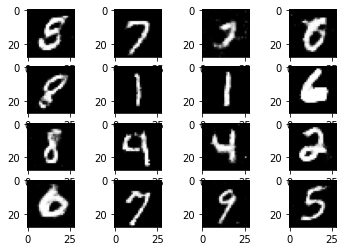

[129/200, 100/938] D_loss: 0.629 G_loss: 1.178
[129/200, 200/938] D_loss: 0.591 G_loss: 0.889
[129/200, 300/938] D_loss: 0.651 G_loss: 0.837
[129/200, 400/938] D_loss: 0.654 G_loss: 1.117
[129/200, 500/938] D_loss: 0.568 G_loss: 1.048
[129/200, 600/938] D_loss: 0.660 G_loss: 0.831
[129/200, 700/938] D_loss: 0.664 G_loss: 1.024
[129/200, 800/938] D_loss: 0.591 G_loss: 0.977
[129/200, 900/938] D_loss: 0.697 G_loss: 0.923
[129/200, 938/938] D_loss: 0.629 G_loss: 0.934


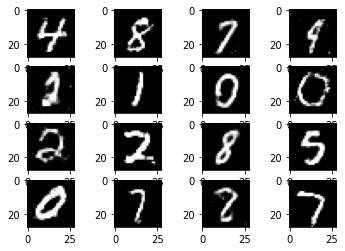

[130/200, 100/938] D_loss: 0.675 G_loss: 1.013
[130/200, 200/938] D_loss: 0.634 G_loss: 0.891
[130/200, 300/938] D_loss: 0.623 G_loss: 0.813
[130/200, 400/938] D_loss: 0.658 G_loss: 1.015
[130/200, 500/938] D_loss: 0.584 G_loss: 1.077
[130/200, 600/938] D_loss: 0.672 G_loss: 0.846
[130/200, 700/938] D_loss: 0.660 G_loss: 0.828
[130/200, 800/938] D_loss: 0.678 G_loss: 0.976
[130/200, 900/938] D_loss: 0.621 G_loss: 0.897
[130/200, 938/938] D_loss: 0.651 G_loss: 0.815


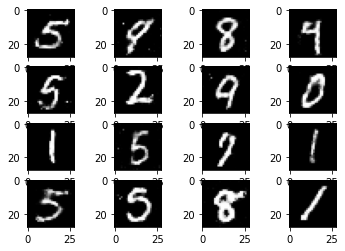

[131/200, 100/938] D_loss: 0.605 G_loss: 1.048
[131/200, 200/938] D_loss: 0.589 G_loss: 0.723
[131/200, 300/938] D_loss: 0.597 G_loss: 0.822
[131/200, 400/938] D_loss: 0.621 G_loss: 1.085
[131/200, 500/938] D_loss: 0.606 G_loss: 0.860
[131/200, 600/938] D_loss: 0.644 G_loss: 1.004
[131/200, 700/938] D_loss: 0.636 G_loss: 0.973
[131/200, 800/938] D_loss: 0.669 G_loss: 0.956
[131/200, 900/938] D_loss: 0.644 G_loss: 0.927
[131/200, 938/938] D_loss: 0.640 G_loss: 0.755


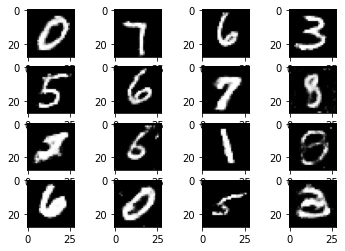

[132/200, 100/938] D_loss: 0.596 G_loss: 0.808
[132/200, 200/938] D_loss: 0.634 G_loss: 0.817
[132/200, 300/938] D_loss: 0.595 G_loss: 1.060
[132/200, 400/938] D_loss: 0.596 G_loss: 0.871
[132/200, 500/938] D_loss: 0.593 G_loss: 1.244
[132/200, 600/938] D_loss: 0.658 G_loss: 1.267
[132/200, 700/938] D_loss: 0.568 G_loss: 0.858
[132/200, 800/938] D_loss: 0.635 G_loss: 0.781
[132/200, 900/938] D_loss: 0.656 G_loss: 0.805
[132/200, 938/938] D_loss: 0.643 G_loss: 1.180


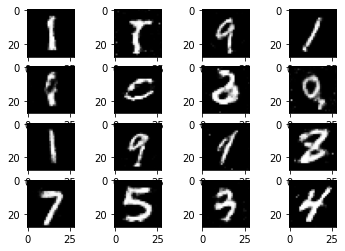

[133/200, 100/938] D_loss: 0.612 G_loss: 0.945
[133/200, 200/938] D_loss: 0.582 G_loss: 0.841
[133/200, 300/938] D_loss: 0.598 G_loss: 0.817
[133/200, 400/938] D_loss: 0.567 G_loss: 0.683
[133/200, 500/938] D_loss: 0.670 G_loss: 1.015
[133/200, 600/938] D_loss: 0.582 G_loss: 1.060
[133/200, 700/938] D_loss: 0.593 G_loss: 0.847
[133/200, 800/938] D_loss: 0.641 G_loss: 0.901
[133/200, 900/938] D_loss: 0.567 G_loss: 0.908
[133/200, 938/938] D_loss: 0.706 G_loss: 1.027


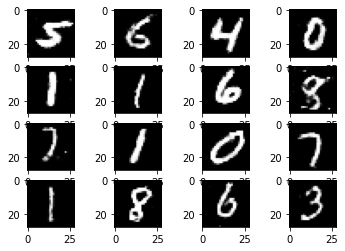

[134/200, 100/938] D_loss: 0.628 G_loss: 1.026
[134/200, 200/938] D_loss: 0.657 G_loss: 0.910
[134/200, 300/938] D_loss: 0.573 G_loss: 1.236
[134/200, 400/938] D_loss: 0.619 G_loss: 1.214
[134/200, 500/938] D_loss: 0.630 G_loss: 0.764
[134/200, 600/938] D_loss: 0.681 G_loss: 0.947
[134/200, 700/938] D_loss: 0.623 G_loss: 1.003
[134/200, 800/938] D_loss: 0.627 G_loss: 1.027
[134/200, 900/938] D_loss: 0.620 G_loss: 0.880
[134/200, 938/938] D_loss: 0.638 G_loss: 0.853


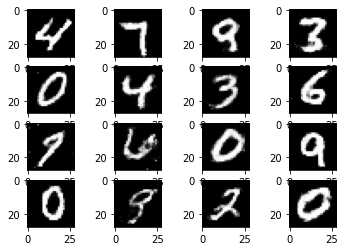

[135/200, 100/938] D_loss: 0.573 G_loss: 0.735
[135/200, 200/938] D_loss: 0.627 G_loss: 0.844
[135/200, 300/938] D_loss: 0.631 G_loss: 0.932
[135/200, 400/938] D_loss: 0.641 G_loss: 0.922
[135/200, 500/938] D_loss: 0.641 G_loss: 0.891
[135/200, 600/938] D_loss: 0.586 G_loss: 1.182
[135/200, 700/938] D_loss: 0.625 G_loss: 0.992
[135/200, 800/938] D_loss: 0.602 G_loss: 0.962
[135/200, 900/938] D_loss: 0.606 G_loss: 0.802
[135/200, 938/938] D_loss: 0.673 G_loss: 0.722


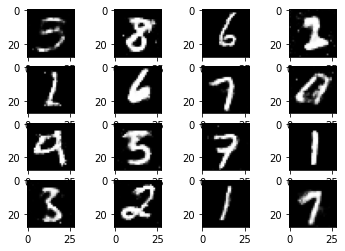

[136/200, 100/938] D_loss: 0.613 G_loss: 1.002
[136/200, 200/938] D_loss: 0.669 G_loss: 0.865
[136/200, 300/938] D_loss: 0.640 G_loss: 0.859
[136/200, 400/938] D_loss: 0.631 G_loss: 0.848
[136/200, 500/938] D_loss: 0.591 G_loss: 0.959
[136/200, 600/938] D_loss: 0.619 G_loss: 0.804
[136/200, 700/938] D_loss: 0.667 G_loss: 0.985
[136/200, 800/938] D_loss: 0.608 G_loss: 1.251
[136/200, 900/938] D_loss: 0.686 G_loss: 0.909
[136/200, 938/938] D_loss: 0.637 G_loss: 0.866


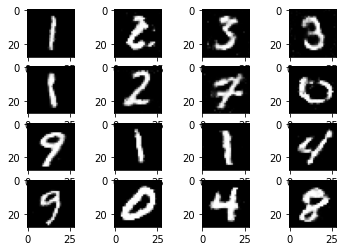

[137/200, 100/938] D_loss: 0.690 G_loss: 1.104
[137/200, 200/938] D_loss: 0.617 G_loss: 0.951
[137/200, 300/938] D_loss: 0.573 G_loss: 0.765
[137/200, 400/938] D_loss: 0.633 G_loss: 0.897
[137/200, 500/938] D_loss: 0.696 G_loss: 0.923
[137/200, 600/938] D_loss: 0.607 G_loss: 1.013
[137/200, 700/938] D_loss: 0.599 G_loss: 1.084
[137/200, 800/938] D_loss: 0.644 G_loss: 0.808
[137/200, 900/938] D_loss: 0.608 G_loss: 0.850
[137/200, 938/938] D_loss: 0.591 G_loss: 0.923


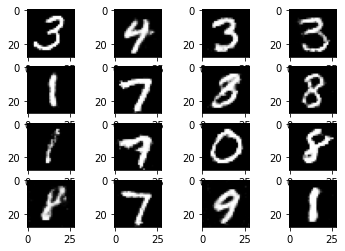

[138/200, 100/938] D_loss: 0.600 G_loss: 0.908
[138/200, 200/938] D_loss: 0.603 G_loss: 0.933
[138/200, 300/938] D_loss: 0.643 G_loss: 1.071
[138/200, 400/938] D_loss: 0.667 G_loss: 0.803
[138/200, 500/938] D_loss: 0.576 G_loss: 1.045
[138/200, 600/938] D_loss: 0.618 G_loss: 0.988
[138/200, 700/938] D_loss: 0.605 G_loss: 0.807
[138/200, 800/938] D_loss: 0.583 G_loss: 0.945
[138/200, 900/938] D_loss: 0.651 G_loss: 0.866
[138/200, 938/938] D_loss: 0.557 G_loss: 0.911


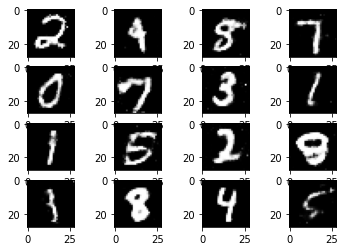

[139/200, 100/938] D_loss: 0.654 G_loss: 0.785
[139/200, 200/938] D_loss: 0.614 G_loss: 0.866
[139/200, 300/938] D_loss: 0.644 G_loss: 0.840
[139/200, 400/938] D_loss: 0.601 G_loss: 0.907
[139/200, 500/938] D_loss: 0.662 G_loss: 0.812
[139/200, 600/938] D_loss: 0.576 G_loss: 0.683
[139/200, 700/938] D_loss: 0.554 G_loss: 0.949
[139/200, 800/938] D_loss: 0.670 G_loss: 1.075
[139/200, 900/938] D_loss: 0.657 G_loss: 0.787
[139/200, 938/938] D_loss: 0.611 G_loss: 0.821


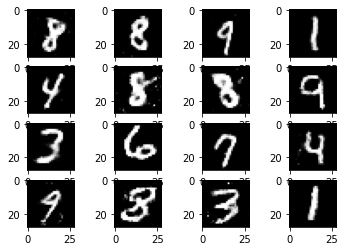

[140/200, 100/938] D_loss: 0.621 G_loss: 0.932
[140/200, 200/938] D_loss: 0.657 G_loss: 1.034
[140/200, 300/938] D_loss: 0.591 G_loss: 0.825
[140/200, 400/938] D_loss: 0.594 G_loss: 0.904
[140/200, 500/938] D_loss: 0.677 G_loss: 0.938
[140/200, 600/938] D_loss: 0.571 G_loss: 0.930
[140/200, 700/938] D_loss: 0.662 G_loss: 1.028
[140/200, 800/938] D_loss: 0.617 G_loss: 0.916
[140/200, 900/938] D_loss: 0.633 G_loss: 0.917
[140/200, 938/938] D_loss: 0.687 G_loss: 0.733


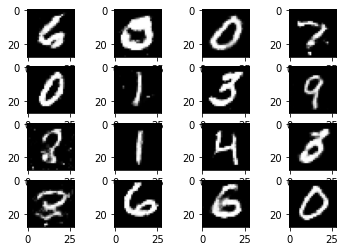

[141/200, 100/938] D_loss: 0.621 G_loss: 0.946
[141/200, 200/938] D_loss: 0.639 G_loss: 1.388
[141/200, 300/938] D_loss: 0.592 G_loss: 0.717
[141/200, 400/938] D_loss: 0.646 G_loss: 0.931
[141/200, 500/938] D_loss: 0.602 G_loss: 0.831
[141/200, 600/938] D_loss: 0.619 G_loss: 0.895
[141/200, 700/938] D_loss: 0.591 G_loss: 0.895
[141/200, 800/938] D_loss: 0.649 G_loss: 1.026
[141/200, 900/938] D_loss: 0.673 G_loss: 1.032
[141/200, 938/938] D_loss: 0.580 G_loss: 0.823


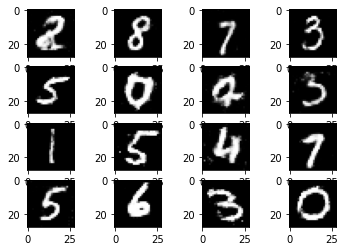

[142/200, 100/938] D_loss: 0.595 G_loss: 0.971
[142/200, 200/938] D_loss: 0.639 G_loss: 0.900
[142/200, 300/938] D_loss: 0.650 G_loss: 0.886
[142/200, 400/938] D_loss: 0.604 G_loss: 1.004
[142/200, 500/938] D_loss: 0.580 G_loss: 0.799
[142/200, 600/938] D_loss: 0.587 G_loss: 0.819
[142/200, 700/938] D_loss: 0.634 G_loss: 1.250
[142/200, 800/938] D_loss: 0.566 G_loss: 0.997
[142/200, 900/938] D_loss: 0.652 G_loss: 0.832
[142/200, 938/938] D_loss: 0.607 G_loss: 0.862


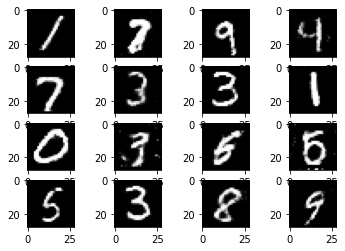

[143/200, 100/938] D_loss: 0.614 G_loss: 0.959
[143/200, 200/938] D_loss: 0.596 G_loss: 0.957
[143/200, 300/938] D_loss: 0.559 G_loss: 0.994
[143/200, 400/938] D_loss: 0.652 G_loss: 1.015
[143/200, 500/938] D_loss: 0.634 G_loss: 0.934
[143/200, 600/938] D_loss: 0.644 G_loss: 1.014
[143/200, 700/938] D_loss: 0.611 G_loss: 0.672
[143/200, 800/938] D_loss: 0.637 G_loss: 0.689
[143/200, 900/938] D_loss: 0.618 G_loss: 0.838
[143/200, 938/938] D_loss: 0.716 G_loss: 0.678


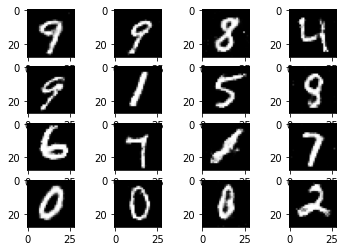

[144/200, 100/938] D_loss: 0.655 G_loss: 0.893
[144/200, 200/938] D_loss: 0.647 G_loss: 0.573
[144/200, 300/938] D_loss: 0.647 G_loss: 0.759
[144/200, 400/938] D_loss: 0.685 G_loss: 0.760
[144/200, 500/938] D_loss: 0.575 G_loss: 0.910
[144/200, 600/938] D_loss: 0.586 G_loss: 0.975
[144/200, 700/938] D_loss: 0.602 G_loss: 1.104
[144/200, 800/938] D_loss: 0.592 G_loss: 1.010
[144/200, 900/938] D_loss: 0.666 G_loss: 1.123
[144/200, 938/938] D_loss: 0.615 G_loss: 0.715


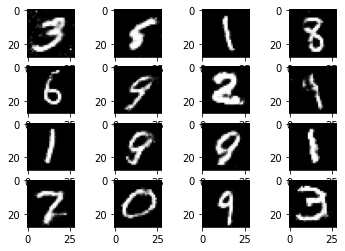

[145/200, 100/938] D_loss: 0.615 G_loss: 0.943
[145/200, 200/938] D_loss: 0.601 G_loss: 0.937
[145/200, 300/938] D_loss: 0.619 G_loss: 0.806
[145/200, 400/938] D_loss: 0.639 G_loss: 0.700
[145/200, 500/938] D_loss: 0.635 G_loss: 0.948
[145/200, 600/938] D_loss: 0.597 G_loss: 1.012
[145/200, 700/938] D_loss: 0.576 G_loss: 0.909
[145/200, 800/938] D_loss: 0.563 G_loss: 0.751
[145/200, 900/938] D_loss: 0.600 G_loss: 1.031
[145/200, 938/938] D_loss: 0.661 G_loss: 0.699


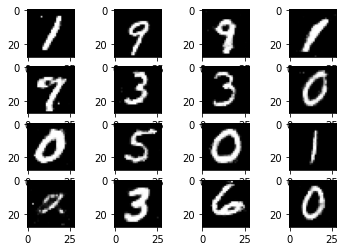

[146/200, 100/938] D_loss: 0.655 G_loss: 0.776
[146/200, 200/938] D_loss: 0.606 G_loss: 0.841
[146/200, 300/938] D_loss: 0.602 G_loss: 0.854
[146/200, 400/938] D_loss: 0.662 G_loss: 0.785
[146/200, 500/938] D_loss: 0.631 G_loss: 1.072
[146/200, 600/938] D_loss: 0.607 G_loss: 1.055
[146/200, 700/938] D_loss: 0.622 G_loss: 0.874
[146/200, 800/938] D_loss: 0.646 G_loss: 0.768
[146/200, 900/938] D_loss: 0.618 G_loss: 0.933
[146/200, 938/938] D_loss: 0.617 G_loss: 1.163


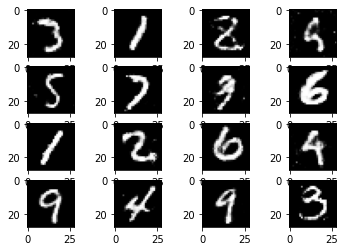

[147/200, 100/938] D_loss: 0.603 G_loss: 0.862
[147/200, 200/938] D_loss: 0.612 G_loss: 0.990
[147/200, 300/938] D_loss: 0.642 G_loss: 0.899
[147/200, 400/938] D_loss: 0.586 G_loss: 0.872
[147/200, 500/938] D_loss: 0.680 G_loss: 0.956
[147/200, 600/938] D_loss: 0.565 G_loss: 0.943
[147/200, 700/938] D_loss: 0.636 G_loss: 0.805
[147/200, 800/938] D_loss: 0.600 G_loss: 0.822
[147/200, 900/938] D_loss: 0.610 G_loss: 1.002
[147/200, 938/938] D_loss: 0.625 G_loss: 1.012


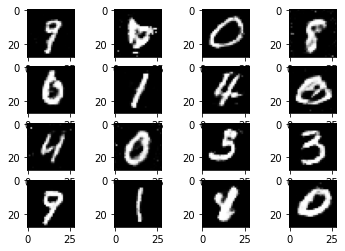

[148/200, 100/938] D_loss: 0.599 G_loss: 0.785
[148/200, 200/938] D_loss: 0.669 G_loss: 0.880
[148/200, 300/938] D_loss: 0.609 G_loss: 0.747
[148/200, 400/938] D_loss: 0.599 G_loss: 0.814
[148/200, 500/938] D_loss: 0.537 G_loss: 0.700
[148/200, 600/938] D_loss: 0.588 G_loss: 0.742
[148/200, 700/938] D_loss: 0.622 G_loss: 1.068
[148/200, 800/938] D_loss: 0.641 G_loss: 0.771
[148/200, 900/938] D_loss: 0.625 G_loss: 1.073
[148/200, 938/938] D_loss: 0.637 G_loss: 0.820


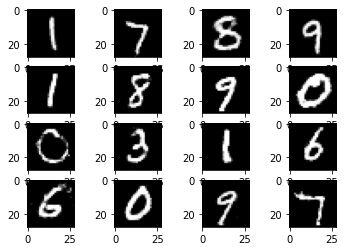

[149/200, 100/938] D_loss: 0.543 G_loss: 1.084
[149/200, 200/938] D_loss: 0.564 G_loss: 0.869
[149/200, 300/938] D_loss: 0.592 G_loss: 0.912
[149/200, 400/938] D_loss: 0.647 G_loss: 0.962
[149/200, 500/938] D_loss: 0.612 G_loss: 0.899
[149/200, 600/938] D_loss: 0.653 G_loss: 0.854
[149/200, 700/938] D_loss: 0.578 G_loss: 1.110
[149/200, 800/938] D_loss: 0.629 G_loss: 1.010
[149/200, 900/938] D_loss: 0.601 G_loss: 0.888
[149/200, 938/938] D_loss: 0.624 G_loss: 0.807


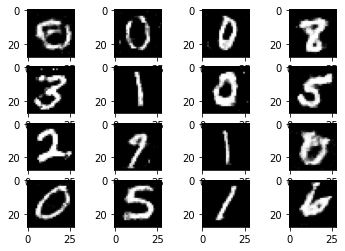

[150/200, 100/938] D_loss: 0.576 G_loss: 0.931
[150/200, 200/938] D_loss: 0.585 G_loss: 0.765
[150/200, 300/938] D_loss: 0.624 G_loss: 0.864
[150/200, 400/938] D_loss: 0.627 G_loss: 1.136
[150/200, 500/938] D_loss: 0.598 G_loss: 0.850
[150/200, 600/938] D_loss: 0.593 G_loss: 0.942
[150/200, 700/938] D_loss: 0.608 G_loss: 0.737
[150/200, 800/938] D_loss: 0.622 G_loss: 1.020
[150/200, 900/938] D_loss: 0.625 G_loss: 0.768
[150/200, 938/938] D_loss: 0.665 G_loss: 0.683


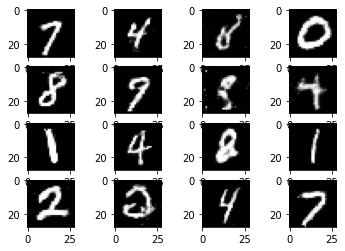

Model saved.
[151/200, 100/938] D_loss: 0.599 G_loss: 0.736
[151/200, 200/938] D_loss: 0.610 G_loss: 0.987
[151/200, 300/938] D_loss: 0.642 G_loss: 1.067
[151/200, 400/938] D_loss: 0.599 G_loss: 0.827
[151/200, 500/938] D_loss: 0.595 G_loss: 1.135
[151/200, 600/938] D_loss: 0.639 G_loss: 0.923
[151/200, 700/938] D_loss: 0.675 G_loss: 1.035
[151/200, 800/938] D_loss: 0.589 G_loss: 1.181
[151/200, 900/938] D_loss: 0.616 G_loss: 1.042
[151/200, 938/938] D_loss: 0.537 G_loss: 0.870


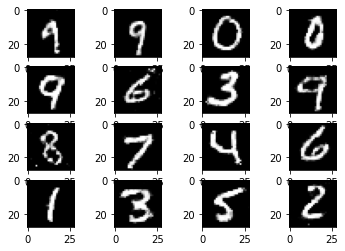

[152/200, 100/938] D_loss: 0.606 G_loss: 1.138
[152/200, 200/938] D_loss: 0.669 G_loss: 1.098
[152/200, 300/938] D_loss: 0.641 G_loss: 0.660
[152/200, 400/938] D_loss: 0.640 G_loss: 0.805
[152/200, 500/938] D_loss: 0.589 G_loss: 1.069
[152/200, 600/938] D_loss: 0.588 G_loss: 1.059
[152/200, 700/938] D_loss: 0.636 G_loss: 0.879
[152/200, 800/938] D_loss: 0.613 G_loss: 0.926
[152/200, 900/938] D_loss: 0.670 G_loss: 0.706
[152/200, 938/938] D_loss: 0.652 G_loss: 1.580


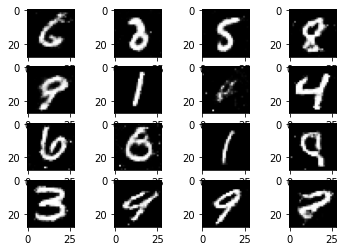

[153/200, 100/938] D_loss: 0.564 G_loss: 1.050
[153/200, 200/938] D_loss: 0.694 G_loss: 0.937
[153/200, 300/938] D_loss: 0.578 G_loss: 0.815
[153/200, 400/938] D_loss: 0.596 G_loss: 0.757
[153/200, 500/938] D_loss: 0.608 G_loss: 1.013
[153/200, 600/938] D_loss: 0.633 G_loss: 0.823
[153/200, 700/938] D_loss: 0.626 G_loss: 0.799
[153/200, 800/938] D_loss: 0.627 G_loss: 0.711
[153/200, 900/938] D_loss: 0.596 G_loss: 0.905
[153/200, 938/938] D_loss: 0.623 G_loss: 0.776


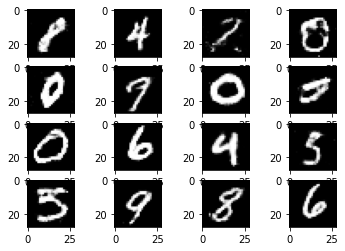

[154/200, 100/938] D_loss: 0.560 G_loss: 0.838
[154/200, 200/938] D_loss: 0.614 G_loss: 0.773
[154/200, 300/938] D_loss: 0.560 G_loss: 1.110
[154/200, 400/938] D_loss: 0.621 G_loss: 0.820
[154/200, 500/938] D_loss: 0.578 G_loss: 0.721
[154/200, 600/938] D_loss: 0.599 G_loss: 1.013
[154/200, 700/938] D_loss: 0.624 G_loss: 0.760
[154/200, 800/938] D_loss: 0.664 G_loss: 0.859
[154/200, 900/938] D_loss: 0.603 G_loss: 0.796
[154/200, 938/938] D_loss: 0.635 G_loss: 0.700


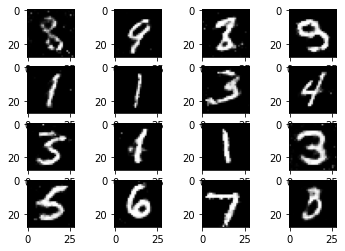

[155/200, 100/938] D_loss: 0.600 G_loss: 1.155
[155/200, 200/938] D_loss: 0.621 G_loss: 0.869
[155/200, 300/938] D_loss: 0.607 G_loss: 0.657
[155/200, 400/938] D_loss: 0.597 G_loss: 1.048
[155/200, 500/938] D_loss: 0.637 G_loss: 0.842
[155/200, 600/938] D_loss: 0.633 G_loss: 0.874
[155/200, 700/938] D_loss: 0.625 G_loss: 0.958
[155/200, 800/938] D_loss: 0.728 G_loss: 0.984
[155/200, 900/938] D_loss: 0.618 G_loss: 0.952
[155/200, 938/938] D_loss: 0.605 G_loss: 1.073


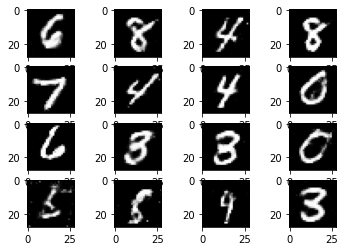

[156/200, 100/938] D_loss: 0.614 G_loss: 0.983
[156/200, 200/938] D_loss: 0.638 G_loss: 1.047
[156/200, 300/938] D_loss: 0.681 G_loss: 0.873
[156/200, 400/938] D_loss: 0.634 G_loss: 1.053
[156/200, 500/938] D_loss: 0.631 G_loss: 1.059
[156/200, 600/938] D_loss: 0.624 G_loss: 1.103
[156/200, 700/938] D_loss: 0.616 G_loss: 0.899
[156/200, 800/938] D_loss: 0.562 G_loss: 0.932
[156/200, 900/938] D_loss: 0.607 G_loss: 0.778
[156/200, 938/938] D_loss: 0.631 G_loss: 0.818


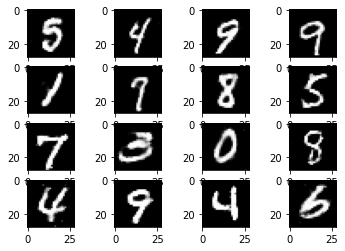

[157/200, 100/938] D_loss: 0.675 G_loss: 0.892
[157/200, 200/938] D_loss: 0.642 G_loss: 0.994
[157/200, 300/938] D_loss: 0.656 G_loss: 0.793
[157/200, 400/938] D_loss: 0.599 G_loss: 0.839
[157/200, 500/938] D_loss: 0.590 G_loss: 0.957
[157/200, 600/938] D_loss: 0.609 G_loss: 1.033
[157/200, 700/938] D_loss: 0.590 G_loss: 1.224
[157/200, 800/938] D_loss: 0.625 G_loss: 0.903
[157/200, 900/938] D_loss: 0.619 G_loss: 0.844
[157/200, 938/938] D_loss: 0.655 G_loss: 0.997


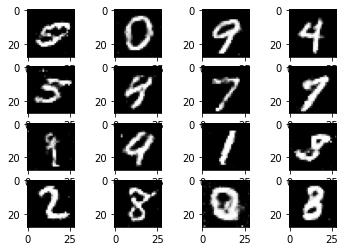

[158/200, 100/938] D_loss: 0.572 G_loss: 0.808
[158/200, 200/938] D_loss: 0.583 G_loss: 0.878
[158/200, 300/938] D_loss: 0.692 G_loss: 0.900
[158/200, 400/938] D_loss: 0.608 G_loss: 0.936
[158/200, 500/938] D_loss: 0.621 G_loss: 1.012
[158/200, 600/938] D_loss: 0.628 G_loss: 0.802
[158/200, 700/938] D_loss: 0.646 G_loss: 0.732
[158/200, 800/938] D_loss: 0.648 G_loss: 0.890
[158/200, 900/938] D_loss: 0.608 G_loss: 0.901
[158/200, 938/938] D_loss: 0.669 G_loss: 0.585


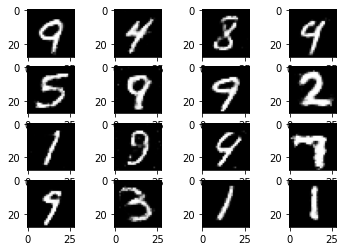

[159/200, 100/938] D_loss: 0.587 G_loss: 1.125
[159/200, 200/938] D_loss: 0.628 G_loss: 0.778
[159/200, 300/938] D_loss: 0.600 G_loss: 0.832
[159/200, 400/938] D_loss: 0.593 G_loss: 1.093
[159/200, 500/938] D_loss: 0.654 G_loss: 0.769
[159/200, 600/938] D_loss: 0.635 G_loss: 1.062
[159/200, 700/938] D_loss: 0.624 G_loss: 0.953
[159/200, 800/938] D_loss: 0.663 G_loss: 1.015
[159/200, 900/938] D_loss: 0.622 G_loss: 0.919
[159/200, 938/938] D_loss: 0.592 G_loss: 1.274


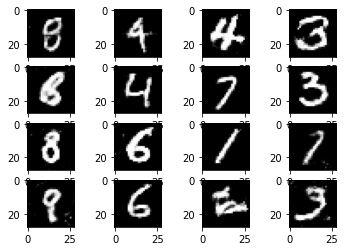

[160/200, 100/938] D_loss: 0.639 G_loss: 1.054
[160/200, 200/938] D_loss: 0.595 G_loss: 0.882
[160/200, 300/938] D_loss: 0.564 G_loss: 1.045
[160/200, 400/938] D_loss: 0.617 G_loss: 0.977
[160/200, 500/938] D_loss: 0.647 G_loss: 0.887
[160/200, 600/938] D_loss: 0.640 G_loss: 0.788
[160/200, 700/938] D_loss: 0.609 G_loss: 0.865
[160/200, 800/938] D_loss: 0.610 G_loss: 0.825
[160/200, 900/938] D_loss: 0.643 G_loss: 0.982
[160/200, 938/938] D_loss: 0.588 G_loss: 0.656


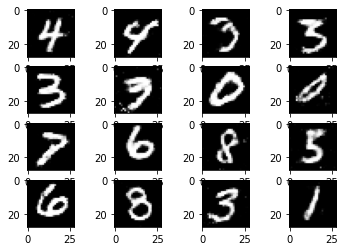

[161/200, 100/938] D_loss: 0.656 G_loss: 0.851
[161/200, 200/938] D_loss: 0.582 G_loss: 0.773
[161/200, 300/938] D_loss: 0.591 G_loss: 0.995
[161/200, 400/938] D_loss: 0.603 G_loss: 0.987
[161/200, 500/938] D_loss: 0.618 G_loss: 0.806
[161/200, 600/938] D_loss: 0.634 G_loss: 0.821
[161/200, 700/938] D_loss: 0.657 G_loss: 0.610
[161/200, 800/938] D_loss: 0.664 G_loss: 0.892
[161/200, 900/938] D_loss: 0.619 G_loss: 1.062
[161/200, 938/938] D_loss: 0.582 G_loss: 0.862


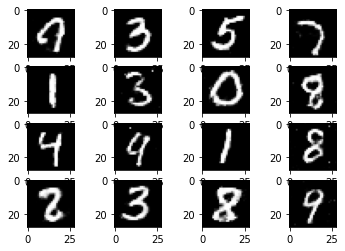

[162/200, 100/938] D_loss: 0.615 G_loss: 0.754
[162/200, 200/938] D_loss: 0.622 G_loss: 1.049
[162/200, 300/938] D_loss: 0.610 G_loss: 0.911
[162/200, 400/938] D_loss: 0.643 G_loss: 0.789
[162/200, 500/938] D_loss: 0.636 G_loss: 0.960
[162/200, 600/938] D_loss: 0.650 G_loss: 0.954
[162/200, 700/938] D_loss: 0.605 G_loss: 1.078
[162/200, 800/938] D_loss: 0.588 G_loss: 0.832
[162/200, 900/938] D_loss: 0.628 G_loss: 1.101
[162/200, 938/938] D_loss: 0.642 G_loss: 1.098


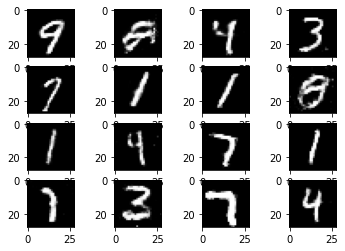

[163/200, 100/938] D_loss: 0.644 G_loss: 0.780
[163/200, 200/938] D_loss: 0.600 G_loss: 1.117
[163/200, 300/938] D_loss: 0.599 G_loss: 0.867
[163/200, 400/938] D_loss: 0.564 G_loss: 0.903
[163/200, 500/938] D_loss: 0.619 G_loss: 0.855
[163/200, 600/938] D_loss: 0.601 G_loss: 0.988
[163/200, 700/938] D_loss: 0.562 G_loss: 0.859
[163/200, 800/938] D_loss: 0.605 G_loss: 0.782
[163/200, 900/938] D_loss: 0.559 G_loss: 0.926
[163/200, 938/938] D_loss: 0.563 G_loss: 0.869


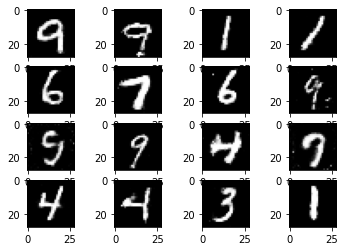

[164/200, 100/938] D_loss: 0.633 G_loss: 0.713
[164/200, 200/938] D_loss: 0.605 G_loss: 0.829
[164/200, 300/938] D_loss: 0.597 G_loss: 0.891
[164/200, 400/938] D_loss: 0.671 G_loss: 0.802
[164/200, 500/938] D_loss: 0.566 G_loss: 0.950
[164/200, 600/938] D_loss: 0.605 G_loss: 1.017
[164/200, 700/938] D_loss: 0.620 G_loss: 0.979
[164/200, 800/938] D_loss: 0.650 G_loss: 1.021
[164/200, 900/938] D_loss: 0.607 G_loss: 0.955
[164/200, 938/938] D_loss: 0.662 G_loss: 0.571


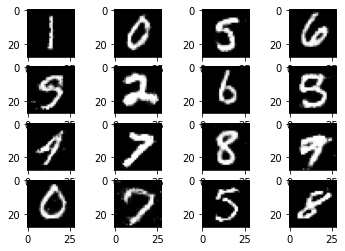

[165/200, 100/938] D_loss: 0.674 G_loss: 1.109
[165/200, 200/938] D_loss: 0.596 G_loss: 0.990
[165/200, 300/938] D_loss: 0.593 G_loss: 0.981
[165/200, 400/938] D_loss: 0.628 G_loss: 1.043
[165/200, 500/938] D_loss: 0.613 G_loss: 0.834
[165/200, 600/938] D_loss: 0.635 G_loss: 1.135
[165/200, 700/938] D_loss: 0.624 G_loss: 1.085
[165/200, 800/938] D_loss: 0.648 G_loss: 0.932
[165/200, 900/938] D_loss: 0.629 G_loss: 0.966
[165/200, 938/938] D_loss: 0.606 G_loss: 1.024


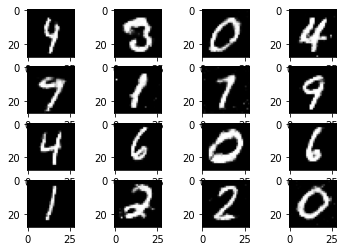

[166/200, 100/938] D_loss: 0.566 G_loss: 1.003
[166/200, 200/938] D_loss: 0.616 G_loss: 1.007
[166/200, 300/938] D_loss: 0.588 G_loss: 1.231
[166/200, 400/938] D_loss: 0.652 G_loss: 1.216
[166/200, 500/938] D_loss: 0.634 G_loss: 1.143
[166/200, 600/938] D_loss: 0.619 G_loss: 1.146
[166/200, 700/938] D_loss: 0.590 G_loss: 1.077
[166/200, 800/938] D_loss: 0.645 G_loss: 1.057
[166/200, 900/938] D_loss: 0.685 G_loss: 0.799
[166/200, 938/938] D_loss: 0.619 G_loss: 1.047


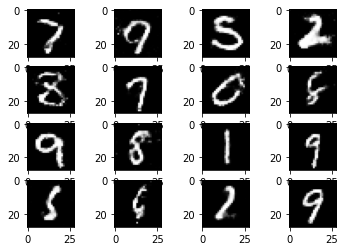

[167/200, 100/938] D_loss: 0.633 G_loss: 1.082
[167/200, 200/938] D_loss: 0.578 G_loss: 0.970
[167/200, 300/938] D_loss: 0.687 G_loss: 1.045
[167/200, 400/938] D_loss: 0.607 G_loss: 0.799
[167/200, 500/938] D_loss: 0.541 G_loss: 0.949
[167/200, 600/938] D_loss: 0.625 G_loss: 1.310
[167/200, 700/938] D_loss: 0.614 G_loss: 0.766
[167/200, 800/938] D_loss: 0.556 G_loss: 0.980
[167/200, 900/938] D_loss: 0.684 G_loss: 1.087
[167/200, 938/938] D_loss: 0.610 G_loss: 0.897


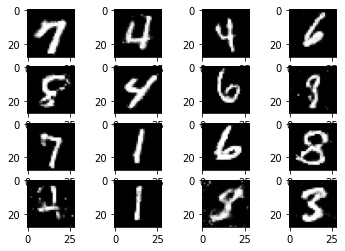

[168/200, 100/938] D_loss: 0.575 G_loss: 0.915
[168/200, 200/938] D_loss: 0.569 G_loss: 1.107
[168/200, 300/938] D_loss: 0.633 G_loss: 1.190
[168/200, 400/938] D_loss: 0.622 G_loss: 0.912
[168/200, 500/938] D_loss: 0.603 G_loss: 0.897
[168/200, 600/938] D_loss: 0.676 G_loss: 0.848
[168/200, 700/938] D_loss: 0.614 G_loss: 1.196
[168/200, 800/938] D_loss: 0.602 G_loss: 0.852
[168/200, 900/938] D_loss: 0.648 G_loss: 0.910
[168/200, 938/938] D_loss: 0.610 G_loss: 0.971


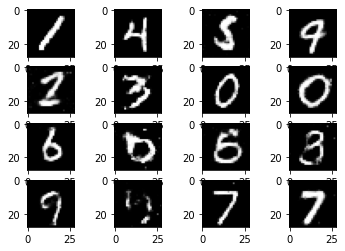

[169/200, 100/938] D_loss: 0.737 G_loss: 0.893
[169/200, 200/938] D_loss: 0.690 G_loss: 0.930
[169/200, 300/938] D_loss: 0.626 G_loss: 0.853
[169/200, 400/938] D_loss: 0.598 G_loss: 1.055
[169/200, 500/938] D_loss: 0.627 G_loss: 0.773
[169/200, 600/938] D_loss: 0.591 G_loss: 0.875
[169/200, 700/938] D_loss: 0.637 G_loss: 0.971
[169/200, 800/938] D_loss: 0.639 G_loss: 0.975
[169/200, 900/938] D_loss: 0.689 G_loss: 0.892
[169/200, 938/938] D_loss: 0.680 G_loss: 0.892


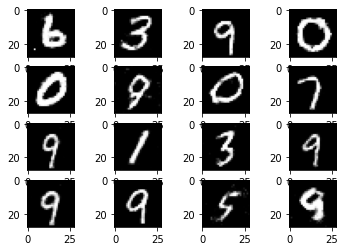

[170/200, 100/938] D_loss: 0.674 G_loss: 0.933
[170/200, 200/938] D_loss: 0.696 G_loss: 0.925
[170/200, 300/938] D_loss: 0.625 G_loss: 0.959
[170/200, 400/938] D_loss: 0.592 G_loss: 1.151
[170/200, 500/938] D_loss: 0.555 G_loss: 1.045
[170/200, 600/938] D_loss: 0.679 G_loss: 0.986
[170/200, 700/938] D_loss: 0.649 G_loss: 0.908
[170/200, 800/938] D_loss: 0.715 G_loss: 1.246
[170/200, 900/938] D_loss: 0.663 G_loss: 0.767
[170/200, 938/938] D_loss: 0.598 G_loss: 0.937


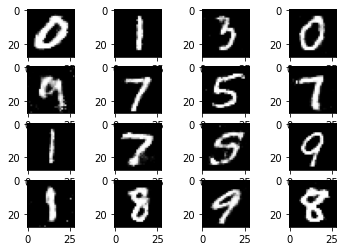

[171/200, 100/938] D_loss: 0.608 G_loss: 0.999
[171/200, 200/938] D_loss: 0.614 G_loss: 0.972
[171/200, 300/938] D_loss: 0.632 G_loss: 0.933
[171/200, 400/938] D_loss: 0.582 G_loss: 0.749
[171/200, 500/938] D_loss: 0.597 G_loss: 1.052
[171/200, 600/938] D_loss: 0.591 G_loss: 0.800
[171/200, 700/938] D_loss: 0.578 G_loss: 1.118
[171/200, 800/938] D_loss: 0.684 G_loss: 1.168
[171/200, 900/938] D_loss: 0.621 G_loss: 0.950
[171/200, 938/938] D_loss: 0.669 G_loss: 1.057


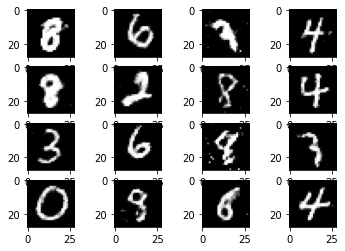

[172/200, 100/938] D_loss: 0.603 G_loss: 1.046
[172/200, 200/938] D_loss: 0.638 G_loss: 0.873
[172/200, 300/938] D_loss: 0.646 G_loss: 0.998
[172/200, 400/938] D_loss: 0.584 G_loss: 0.897
[172/200, 500/938] D_loss: 0.688 G_loss: 0.956
[172/200, 600/938] D_loss: 0.651 G_loss: 1.165
[172/200, 700/938] D_loss: 0.553 G_loss: 1.108
[172/200, 800/938] D_loss: 0.628 G_loss: 1.073
[172/200, 900/938] D_loss: 0.617 G_loss: 0.852
[172/200, 938/938] D_loss: 0.697 G_loss: 1.031


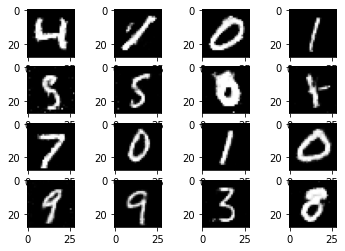

[173/200, 100/938] D_loss: 0.631 G_loss: 1.101
[173/200, 200/938] D_loss: 0.599 G_loss: 0.926
[173/200, 300/938] D_loss: 0.591 G_loss: 0.983
[173/200, 400/938] D_loss: 0.615 G_loss: 0.977
[173/200, 500/938] D_loss: 0.536 G_loss: 0.963
[173/200, 600/938] D_loss: 0.577 G_loss: 0.969
[173/200, 700/938] D_loss: 0.607 G_loss: 0.937
[173/200, 800/938] D_loss: 0.641 G_loss: 0.907
[173/200, 900/938] D_loss: 0.622 G_loss: 0.782
[173/200, 938/938] D_loss: 0.634 G_loss: 1.060


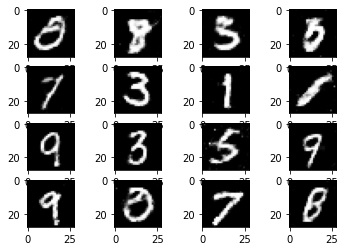

[174/200, 100/938] D_loss: 0.634 G_loss: 1.314
[174/200, 200/938] D_loss: 0.623 G_loss: 1.057
[174/200, 300/938] D_loss: 0.698 G_loss: 0.988
[174/200, 400/938] D_loss: 0.579 G_loss: 1.141
[174/200, 500/938] D_loss: 0.589 G_loss: 0.990
[174/200, 600/938] D_loss: 0.625 G_loss: 1.028
[174/200, 700/938] D_loss: 0.600 G_loss: 1.143
[174/200, 800/938] D_loss: 0.594 G_loss: 1.142
[174/200, 900/938] D_loss: 0.656 G_loss: 0.777
[174/200, 938/938] D_loss: 0.567 G_loss: 0.894


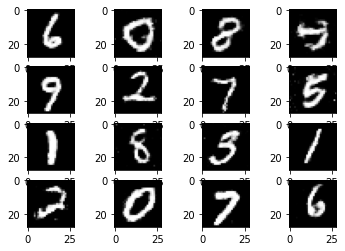

[175/200, 100/938] D_loss: 0.592 G_loss: 0.970
[175/200, 200/938] D_loss: 0.618 G_loss: 1.011
[175/200, 300/938] D_loss: 0.653 G_loss: 1.072
[175/200, 400/938] D_loss: 0.592 G_loss: 1.057
[175/200, 500/938] D_loss: 0.679 G_loss: 0.835
[175/200, 600/938] D_loss: 0.644 G_loss: 0.858
[175/200, 700/938] D_loss: 0.638 G_loss: 0.869
[175/200, 800/938] D_loss: 0.606 G_loss: 0.971
[175/200, 900/938] D_loss: 0.681 G_loss: 0.826
[175/200, 938/938] D_loss: 0.588 G_loss: 0.956


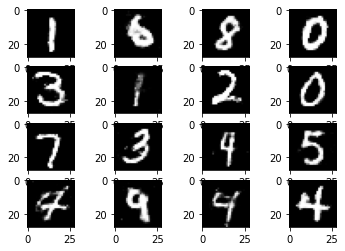

[176/200, 100/938] D_loss: 0.684 G_loss: 0.907
[176/200, 200/938] D_loss: 0.584 G_loss: 0.843
[176/200, 300/938] D_loss: 0.626 G_loss: 1.019
[176/200, 400/938] D_loss: 0.619 G_loss: 1.005
[176/200, 500/938] D_loss: 0.609 G_loss: 0.924
[176/200, 600/938] D_loss: 0.654 G_loss: 1.109
[176/200, 700/938] D_loss: 0.578 G_loss: 0.898
[176/200, 800/938] D_loss: 0.622 G_loss: 0.891
[176/200, 900/938] D_loss: 0.606 G_loss: 1.129
[176/200, 938/938] D_loss: 0.469 G_loss: 1.099


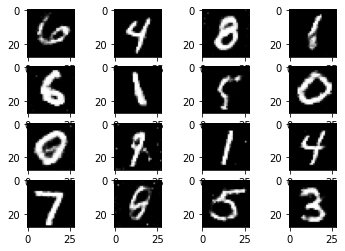

[177/200, 100/938] D_loss: 0.596 G_loss: 1.139
[177/200, 200/938] D_loss: 0.589 G_loss: 0.815
[177/200, 300/938] D_loss: 0.602 G_loss: 0.733
[177/200, 400/938] D_loss: 0.642 G_loss: 1.287
[177/200, 500/938] D_loss: 0.649 G_loss: 1.067
[177/200, 600/938] D_loss: 0.659 G_loss: 1.090
[177/200, 700/938] D_loss: 0.633 G_loss: 0.827
[177/200, 800/938] D_loss: 0.622 G_loss: 0.659
[177/200, 900/938] D_loss: 0.614 G_loss: 0.914
[177/200, 938/938] D_loss: 0.543 G_loss: 1.179


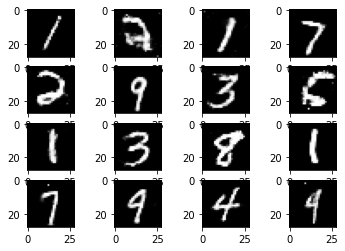

[178/200, 100/938] D_loss: 0.590 G_loss: 1.071
[178/200, 200/938] D_loss: 0.639 G_loss: 0.860
[178/200, 300/938] D_loss: 0.596 G_loss: 0.868
[178/200, 400/938] D_loss: 0.644 G_loss: 0.871
[178/200, 500/938] D_loss: 0.637 G_loss: 0.733
[178/200, 600/938] D_loss: 0.573 G_loss: 0.840
[178/200, 700/938] D_loss: 0.613 G_loss: 0.722
[178/200, 800/938] D_loss: 0.627 G_loss: 0.862
[178/200, 900/938] D_loss: 0.554 G_loss: 0.855
[178/200, 938/938] D_loss: 0.560 G_loss: 0.880


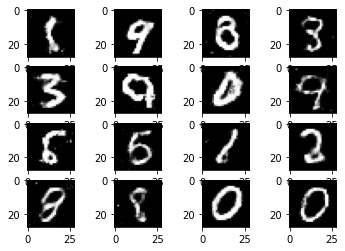

[179/200, 100/938] D_loss: 0.622 G_loss: 0.955
[179/200, 200/938] D_loss: 0.618 G_loss: 0.912
[179/200, 300/938] D_loss: 0.588 G_loss: 0.925
[179/200, 400/938] D_loss: 0.596 G_loss: 0.892
[179/200, 500/938] D_loss: 0.634 G_loss: 0.768
[179/200, 600/938] D_loss: 0.584 G_loss: 0.883
[179/200, 700/938] D_loss: 0.588 G_loss: 0.832
[179/200, 800/938] D_loss: 0.594 G_loss: 1.009
[179/200, 900/938] D_loss: 0.599 G_loss: 0.817
[179/200, 938/938] D_loss: 0.583 G_loss: 0.791


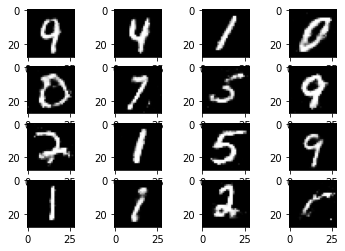

[180/200, 100/938] D_loss: 0.636 G_loss: 1.180
[180/200, 200/938] D_loss: 0.532 G_loss: 0.944
[180/200, 300/938] D_loss: 0.641 G_loss: 0.827
[180/200, 400/938] D_loss: 0.573 G_loss: 1.062
[180/200, 500/938] D_loss: 0.648 G_loss: 1.106
[180/200, 600/938] D_loss: 0.639 G_loss: 0.935
[180/200, 700/938] D_loss: 0.681 G_loss: 0.853
[180/200, 800/938] D_loss: 0.649 G_loss: 0.706
[180/200, 900/938] D_loss: 0.649 G_loss: 1.004
[180/200, 938/938] D_loss: 0.648 G_loss: 0.826


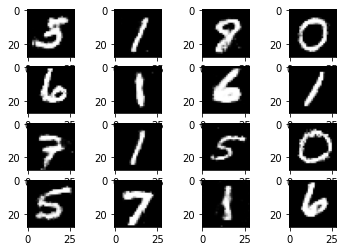

[181/200, 100/938] D_loss: 0.642 G_loss: 1.141
[181/200, 200/938] D_loss: 0.598 G_loss: 0.980
[181/200, 300/938] D_loss: 0.635 G_loss: 0.808
[181/200, 400/938] D_loss: 0.642 G_loss: 1.013
[181/200, 500/938] D_loss: 0.590 G_loss: 1.012
[181/200, 600/938] D_loss: 0.605 G_loss: 0.675
[181/200, 700/938] D_loss: 0.631 G_loss: 0.934
[181/200, 800/938] D_loss: 0.619 G_loss: 0.903
[181/200, 900/938] D_loss: 0.597 G_loss: 0.989
[181/200, 938/938] D_loss: 0.626 G_loss: 0.702


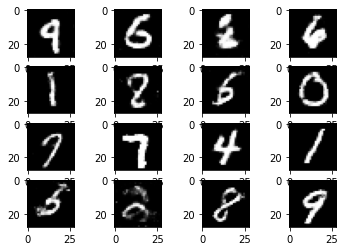

[182/200, 100/938] D_loss: 0.627 G_loss: 1.002
[182/200, 200/938] D_loss: 0.606 G_loss: 1.137
[182/200, 300/938] D_loss: 0.621 G_loss: 1.080
[182/200, 400/938] D_loss: 0.616 G_loss: 0.915
[182/200, 500/938] D_loss: 0.648 G_loss: 0.916
[182/200, 600/938] D_loss: 0.639 G_loss: 1.210
[182/200, 700/938] D_loss: 0.677 G_loss: 0.995
[182/200, 800/938] D_loss: 0.613 G_loss: 1.049
[182/200, 900/938] D_loss: 0.551 G_loss: 0.948
[182/200, 938/938] D_loss: 0.681 G_loss: 0.920


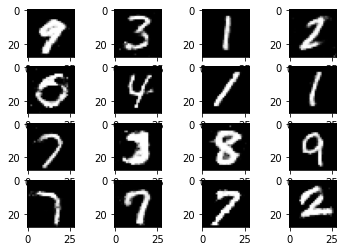

[183/200, 100/938] D_loss: 0.611 G_loss: 0.962
[183/200, 200/938] D_loss: 0.592 G_loss: 0.967
[183/200, 300/938] D_loss: 0.652 G_loss: 0.903
[183/200, 400/938] D_loss: 0.601 G_loss: 0.869
[183/200, 500/938] D_loss: 0.633 G_loss: 1.006
[183/200, 600/938] D_loss: 0.707 G_loss: 1.040
[183/200, 700/938] D_loss: 0.572 G_loss: 0.924
[183/200, 800/938] D_loss: 0.725 G_loss: 1.161
[183/200, 900/938] D_loss: 0.563 G_loss: 0.902
[183/200, 938/938] D_loss: 0.662 G_loss: 0.955


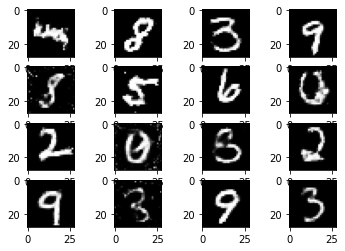

[184/200, 100/938] D_loss: 0.604 G_loss: 0.946
[184/200, 200/938] D_loss: 0.627 G_loss: 1.050
[184/200, 300/938] D_loss: 0.635 G_loss: 0.857
[184/200, 400/938] D_loss: 0.525 G_loss: 1.024
[184/200, 500/938] D_loss: 0.591 G_loss: 1.117
[184/200, 600/938] D_loss: 0.615 G_loss: 1.255
[184/200, 700/938] D_loss: 0.584 G_loss: 0.851
[184/200, 800/938] D_loss: 0.571 G_loss: 0.876
[184/200, 900/938] D_loss: 0.623 G_loss: 0.997
[184/200, 938/938] D_loss: 0.599 G_loss: 1.242


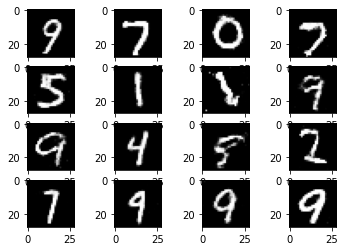

[185/200, 100/938] D_loss: 0.600 G_loss: 0.912
[185/200, 200/938] D_loss: 0.581 G_loss: 1.006
[185/200, 300/938] D_loss: 0.588 G_loss: 0.871
[185/200, 400/938] D_loss: 0.634 G_loss: 0.817
[185/200, 500/938] D_loss: 0.611 G_loss: 1.000
[185/200, 600/938] D_loss: 0.663 G_loss: 0.860
[185/200, 700/938] D_loss: 0.614 G_loss: 1.121
[185/200, 800/938] D_loss: 0.601 G_loss: 0.973
[185/200, 900/938] D_loss: 0.585 G_loss: 0.904
[185/200, 938/938] D_loss: 0.660 G_loss: 0.938


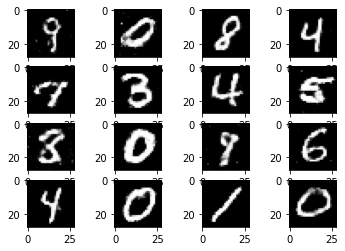

[186/200, 100/938] D_loss: 0.589 G_loss: 1.002
[186/200, 200/938] D_loss: 0.611 G_loss: 0.963
[186/200, 300/938] D_loss: 0.645 G_loss: 1.176
[186/200, 400/938] D_loss: 0.633 G_loss: 0.941
[186/200, 500/938] D_loss: 0.630 G_loss: 0.838
[186/200, 600/938] D_loss: 0.632 G_loss: 1.063
[186/200, 700/938] D_loss: 0.585 G_loss: 0.893
[186/200, 800/938] D_loss: 0.616 G_loss: 0.881
[186/200, 900/938] D_loss: 0.609 G_loss: 1.014
[186/200, 938/938] D_loss: 0.590 G_loss: 0.601


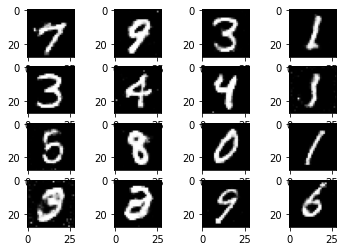

[187/200, 100/938] D_loss: 0.557 G_loss: 1.351
[187/200, 200/938] D_loss: 0.584 G_loss: 0.826
[187/200, 300/938] D_loss: 0.603 G_loss: 0.932
[187/200, 400/938] D_loss: 0.635 G_loss: 0.994
[187/200, 500/938] D_loss: 0.625 G_loss: 1.010
[187/200, 600/938] D_loss: 0.580 G_loss: 0.851
[187/200, 700/938] D_loss: 0.654 G_loss: 1.060
[187/200, 800/938] D_loss: 0.618 G_loss: 1.034
[187/200, 900/938] D_loss: 0.634 G_loss: 0.731
[187/200, 938/938] D_loss: 0.580 G_loss: 0.767


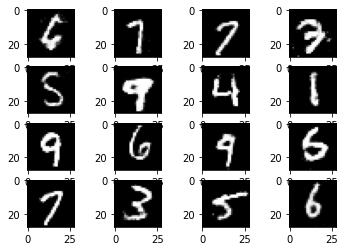

[188/200, 100/938] D_loss: 0.630 G_loss: 0.878
[188/200, 200/938] D_loss: 0.601 G_loss: 0.825
[188/200, 300/938] D_loss: 0.581 G_loss: 0.850
[188/200, 400/938] D_loss: 0.605 G_loss: 0.895
[188/200, 500/938] D_loss: 0.553 G_loss: 0.720
[188/200, 600/938] D_loss: 0.622 G_loss: 1.059
[188/200, 700/938] D_loss: 0.606 G_loss: 0.962
[188/200, 800/938] D_loss: 0.614 G_loss: 0.916
[188/200, 900/938] D_loss: 0.574 G_loss: 0.991
[188/200, 938/938] D_loss: 0.622 G_loss: 1.051


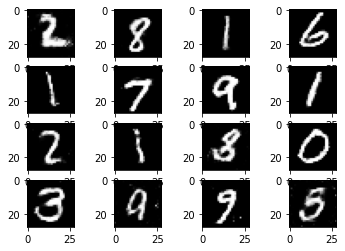

[189/200, 100/938] D_loss: 0.616 G_loss: 0.988
[189/200, 200/938] D_loss: 0.621 G_loss: 0.962
[189/200, 300/938] D_loss: 0.610 G_loss: 1.044
[189/200, 400/938] D_loss: 0.617 G_loss: 0.834
[189/200, 500/938] D_loss: 0.645 G_loss: 1.205
[189/200, 600/938] D_loss: 0.586 G_loss: 1.128
[189/200, 700/938] D_loss: 0.631 G_loss: 0.779
[189/200, 800/938] D_loss: 0.548 G_loss: 0.999
[189/200, 900/938] D_loss: 0.619 G_loss: 1.070
[189/200, 938/938] D_loss: 0.592 G_loss: 0.735


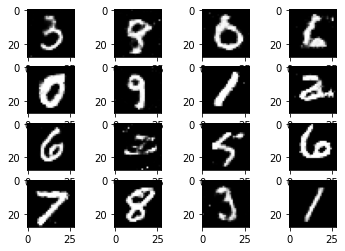

[190/200, 100/938] D_loss: 0.591 G_loss: 1.233
[190/200, 200/938] D_loss: 0.589 G_loss: 0.684
[190/200, 300/938] D_loss: 0.581 G_loss: 0.858
[190/200, 400/938] D_loss: 0.597 G_loss: 1.123
[190/200, 500/938] D_loss: 0.638 G_loss: 0.796
[190/200, 600/938] D_loss: 0.571 G_loss: 1.005
[190/200, 700/938] D_loss: 0.620 G_loss: 1.142
[190/200, 800/938] D_loss: 0.616 G_loss: 0.956
[190/200, 900/938] D_loss: 0.622 G_loss: 1.098
[190/200, 938/938] D_loss: 0.693 G_loss: 0.742


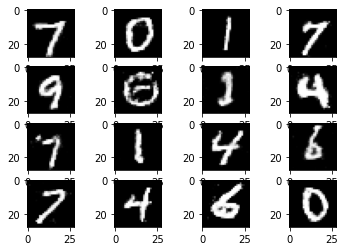

[191/200, 100/938] D_loss: 0.553 G_loss: 0.945
[191/200, 200/938] D_loss: 0.598 G_loss: 0.903
[191/200, 300/938] D_loss: 0.614 G_loss: 0.790
[191/200, 400/938] D_loss: 0.634 G_loss: 0.890
[191/200, 500/938] D_loss: 0.620 G_loss: 0.814
[191/200, 600/938] D_loss: 0.569 G_loss: 1.001
[191/200, 700/938] D_loss: 0.598 G_loss: 0.838
[191/200, 800/938] D_loss: 0.573 G_loss: 1.069
[191/200, 900/938] D_loss: 0.599 G_loss: 0.789
[191/200, 938/938] D_loss: 0.551 G_loss: 1.051


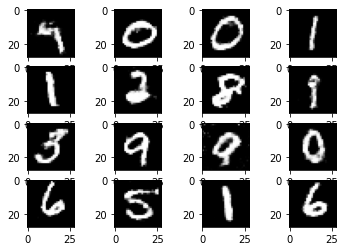

[192/200, 100/938] D_loss: 0.607 G_loss: 1.055
[192/200, 200/938] D_loss: 0.612 G_loss: 0.874
[192/200, 300/938] D_loss: 0.633 G_loss: 1.076
[192/200, 400/938] D_loss: 0.603 G_loss: 0.826
[192/200, 500/938] D_loss: 0.630 G_loss: 0.879
[192/200, 600/938] D_loss: 0.622 G_loss: 0.922
[192/200, 700/938] D_loss: 0.649 G_loss: 1.104
[192/200, 800/938] D_loss: 0.581 G_loss: 0.960
[192/200, 900/938] D_loss: 0.617 G_loss: 1.178
[192/200, 938/938] D_loss: 0.662 G_loss: 0.840


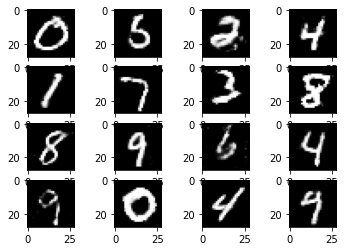

[193/200, 100/938] D_loss: 0.588 G_loss: 0.947
[193/200, 200/938] D_loss: 0.615 G_loss: 0.969
[193/200, 300/938] D_loss: 0.559 G_loss: 1.020
[193/200, 400/938] D_loss: 0.607 G_loss: 1.234
[193/200, 500/938] D_loss: 0.619 G_loss: 1.264
[193/200, 600/938] D_loss: 0.592 G_loss: 0.882
[193/200, 700/938] D_loss: 0.594 G_loss: 1.014
[193/200, 800/938] D_loss: 0.584 G_loss: 0.983
[193/200, 900/938] D_loss: 0.574 G_loss: 0.979
[193/200, 938/938] D_loss: 0.686 G_loss: 0.955


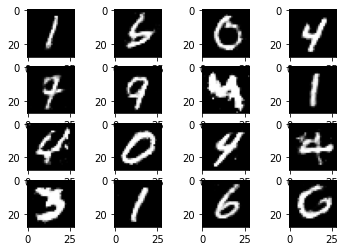

[194/200, 100/938] D_loss: 0.626 G_loss: 0.872
[194/200, 200/938] D_loss: 0.608 G_loss: 1.094
[194/200, 300/938] D_loss: 0.630 G_loss: 1.169
[194/200, 400/938] D_loss: 0.602 G_loss: 0.934
[194/200, 500/938] D_loss: 0.580 G_loss: 0.934
[194/200, 600/938] D_loss: 0.629 G_loss: 0.943
[194/200, 700/938] D_loss: 0.623 G_loss: 0.816
[194/200, 800/938] D_loss: 0.593 G_loss: 0.817
[194/200, 900/938] D_loss: 0.590 G_loss: 1.229
[194/200, 938/938] D_loss: 0.562 G_loss: 0.871


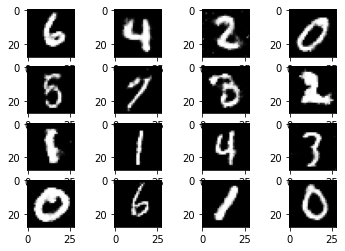

[195/200, 100/938] D_loss: 0.574 G_loss: 0.916
[195/200, 200/938] D_loss: 0.572 G_loss: 1.141
[195/200, 300/938] D_loss: 0.642 G_loss: 0.933
[195/200, 400/938] D_loss: 0.612 G_loss: 0.893
[195/200, 500/938] D_loss: 0.647 G_loss: 1.112
[195/200, 600/938] D_loss: 0.608 G_loss: 1.018
[195/200, 700/938] D_loss: 0.538 G_loss: 1.255
[195/200, 800/938] D_loss: 0.618 G_loss: 0.911
[195/200, 900/938] D_loss: 0.638 G_loss: 0.878
[195/200, 938/938] D_loss: 0.576 G_loss: 0.781


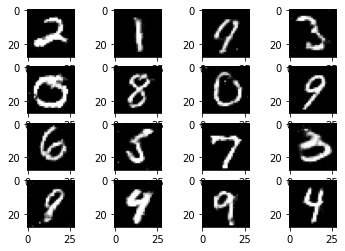

[196/200, 100/938] D_loss: 0.602 G_loss: 1.072
[196/200, 200/938] D_loss: 0.557 G_loss: 0.853
[196/200, 300/938] D_loss: 0.613 G_loss: 0.771
[196/200, 400/938] D_loss: 0.629 G_loss: 0.948
[196/200, 500/938] D_loss: 0.659 G_loss: 1.150
[196/200, 600/938] D_loss: 0.631 G_loss: 0.880
[196/200, 700/938] D_loss: 0.560 G_loss: 1.035
[196/200, 800/938] D_loss: 0.580 G_loss: 0.998
[196/200, 900/938] D_loss: 0.597 G_loss: 1.032
[196/200, 938/938] D_loss: 0.640 G_loss: 0.793


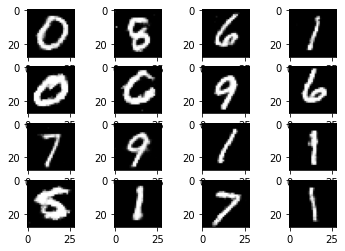

[197/200, 100/938] D_loss: 0.603 G_loss: 1.013
[197/200, 200/938] D_loss: 0.645 G_loss: 1.159
[197/200, 300/938] D_loss: 0.584 G_loss: 0.999
[197/200, 400/938] D_loss: 0.586 G_loss: 0.842
[197/200, 500/938] D_loss: 0.544 G_loss: 1.276
[197/200, 600/938] D_loss: 0.660 G_loss: 0.896
[197/200, 700/938] D_loss: 0.588 G_loss: 1.084
[197/200, 800/938] D_loss: 0.598 G_loss: 0.947
[197/200, 900/938] D_loss: 0.599 G_loss: 0.933
[197/200, 938/938] D_loss: 0.636 G_loss: 1.256


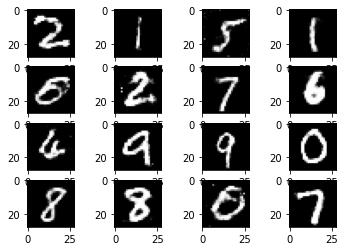

[198/200, 100/938] D_loss: 0.628 G_loss: 0.701
[198/200, 200/938] D_loss: 0.561 G_loss: 0.790
[198/200, 300/938] D_loss: 0.583 G_loss: 0.830
[198/200, 400/938] D_loss: 0.631 G_loss: 1.014
[198/200, 500/938] D_loss: 0.578 G_loss: 1.054
[198/200, 600/938] D_loss: 0.608 G_loss: 0.984
[198/200, 700/938] D_loss: 0.627 G_loss: 0.979
[198/200, 800/938] D_loss: 0.600 G_loss: 0.902
[198/200, 900/938] D_loss: 0.588 G_loss: 0.900
[198/200, 938/938] D_loss: 0.686 G_loss: 0.944


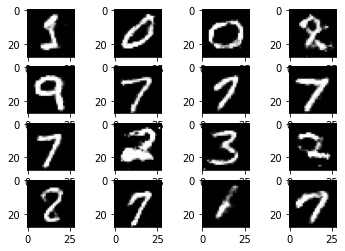

[199/200, 100/938] D_loss: 0.532 G_loss: 0.762
[199/200, 200/938] D_loss: 0.622 G_loss: 0.777
[199/200, 300/938] D_loss: 0.587 G_loss: 0.956
[199/200, 400/938] D_loss: 0.686 G_loss: 0.724
[199/200, 500/938] D_loss: 0.533 G_loss: 0.926
[199/200, 600/938] D_loss: 0.616 G_loss: 0.874
[199/200, 700/938] D_loss: 0.685 G_loss: 1.058
[199/200, 800/938] D_loss: 0.576 G_loss: 0.868
[199/200, 900/938] D_loss: 0.587 G_loss: 1.024
[199/200, 938/938] D_loss: 0.648 G_loss: 0.965


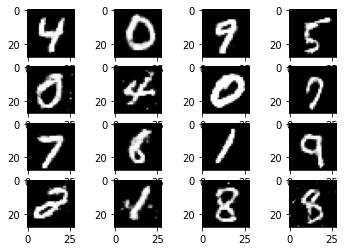

[200/200, 100/938] D_loss: 0.606 G_loss: 0.751
[200/200, 200/938] D_loss: 0.622 G_loss: 1.013
[200/200, 300/938] D_loss: 0.633 G_loss: 0.954
[200/200, 400/938] D_loss: 0.571 G_loss: 0.881
[200/200, 500/938] D_loss: 0.607 G_loss: 0.967
[200/200, 600/938] D_loss: 0.577 G_loss: 0.963
[200/200, 700/938] D_loss: 0.584 G_loss: 0.786
[200/200, 800/938] D_loss: 0.635 G_loss: 0.954
[200/200, 900/938] D_loss: 0.668 G_loss: 0.961
[200/200, 938/938] D_loss: 0.683 G_loss: 0.942


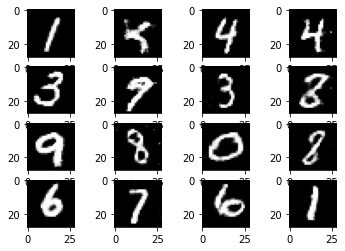

Model saved.
Training Finished.
Cost Time: 4774.718333721161s


In [15]:
#Train
for epoch in range(epochs):
  epoch += 1

  for times, data in enumerate(train_loader):
    times += 1
    real_inputs = data[0].to(device)
    test = 255 * (0.5 * real_inputs[0] + 0.5)

    real_inputs = real_inputs.view(-1, 784)
    real_outputs = D(real_inputs)
    real_label = torch.ones(real_inputs.shape[0], 1).to(device)

    noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5 
    noise = noise.to(device)
    fake_inputs = G(noise) 
    fake_outputs = D(fake_inputs)
    fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device) 

    outputs = torch.cat((real_outputs, fake_outputs), dim = 0)
    targets = torch.cat((real_label, fake_label), dim = 0)

    #Zero the parameters gradients
    d_optimizer.zero_grad() 

    #Backward propagation 
    d_loss = d_loss_function(outputs, targets)
    d_loss.backward() 
    d_optimizer.step() 

    #Generator 
    noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5  
    noise = noise.to(device) 

    fake_inputs = G(noise)  
    fake_outputs = D(fake_inputs)

    g_loss = g_loss_function(fake_outputs)
    g_optimizer.zero_grad() 
    g_loss.backward() 
    g_optimizer.step() 


    if times % 100 == 0 or times == len(train_loader):
      print('[{}/{}, {}/{}] D_loss: {:.3f} G_loss: {:.3f}'.format(epoch, epochs, times, len(train_loader), d_loss.item(), g_loss.item()))

  imgs_numpy = (fake_inputs.data.cpu().numpy() + 1.0) / 2.0 
  show_images(imgs_numpy[:16])
  plt.show() 

  if epoch % 50 == 0:
    torch.save(G, 'Generator_epoch_{}.pth'.format(epoch))
    print('Model saved.')
    
print('Training Finished.')
print('Cost Time: {}s'.format(time.time() - start_time))